In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
np.random.seed(101) 
import glob
from tensorflow.keras import backend as K
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix, f1_score

c:\Users\hsu\anaconda3\envs\keras\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\hsu\anaconda3\envs\keras\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\hsu\anaconda3\envs\keras\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import tensorflow as tf
tf.random.set_seed(323)
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import losses
from sklearn.model_selection import KFold
from scipy import stats
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers

In [3]:
'''muse_data = pd.read_csv("muse_v3.csv")
muse_data'''
muse_data = pd.read_csv("muse_moreinfo.csv")
muse_data

,spotify_id,tempo,key,mode,loudness,time_signature,duration_ms,danceability,acousticness,speechiness,...,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,genre
0,4xkOaSrkexMciUUogZKVTS,171.447,1,1,-3.237,4,297787,0.548,0.06220,0.1860,...,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,rap
1,3fOc9x06lKJBhz435mInlH,185.252,2,0,-2.642,4,441133,0.249,0.00131,0.0678,...,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,metal
2,3Y96xd4Ce0J47dcalLrEC8,100.059,1,1,-4.226,4,204960,0.668,0.10900,0.0429,...,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,rap
3,6tqFC1DIOphJkCwrjVzPmg,125.984,9,1,-4.554,4,298360,0.805,0.04930,0.2120,...,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,hip-hop
4,5bU4KX47KqtDKKaLM4QCzh,126.020,5,0,-3.524,4,186067,0.657,0.00169,0.0700,...,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60649,2bRIsZ92JRKlvQOZlyR9CO,167.996,0,0,-5.126,4,258373,0.396,0.03340,0.1560,...,https://www.last.fm/music/quietdrive/_/secret,Secret,Quietdrive,['transparent'],1,5.370000,3.450000,5.330000,909ba2e0-6076-4ad8-8be9-a335725de4ef,NaN
60650,7o3Np7cho9cBCrNDokxzYC,144.844,2,0,-5.774,3,324000,0.244,0.00433,0.0674,...,https://www.last.fm/music/medications/_/the%2b...,The Last of the Rest Was the End,Medications,['transparent'],1,5.370000,3.450000,5.330000,ffd10ae8-858a-4b5e-819e-64f1174bbd42,NaN
60651,4fVObxldDzxxRD6a5Eth9s,79.476,10,0,-20.091,4,516280,0.236,0.90100,0.0344,...,https://www.last.fm/music/daniel%2blanois/_/lo...,Lovechild,Daniel Lanois,['transparent'],2,6.685000,4.405000,5.625000,16c3d394-c4d4-4dc2-bbf1-b2bef3ac861c,indie
60652,5WxwRwUQ4R4L46VEm3213y,160.011,2,0,-8.977,4,324258,0.542,0.07180,0.1230,...,https://www.last.fm/music/tapage/_/last%2binhale,Last Inhale,Tapage,['transparent'],6,4.301667,3.341667,4.466667,b744fdbc-7b4c-49a1-a3d6-99047d82eb34,ambient


In [4]:
label_file = "id_metadata.csv"
music4all = pd.read_csv(label_file,sep = "	")
music4all

,id,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
0,0009fFIM1eYThaPg,3eObKIfHKJ1nAPh0wTxFCc,12.0,2009,0.635,0.746,6.0,1.0,0.548,110.973,229947
1,0010xmHR6UICBOYT,27szvF97Tu95GxN98N52fy,46.0,2013,0.591,0.513,7.0,0.0,0.263,172.208,325096
2,002Jyd0vN4HyCpqL,273lBFpxUCwisTpdnF9cVb,31.0,1974,0.319,0.925,2.0,1.0,0.658,157.630,285693
3,006TYKNjNxWjfKjy,1qZgergQ41vaD4zBf3AKXR,33.0,2017,0.432,0.979,7.0,1.0,0.162,90.008,332867
4,007LIJOPQ4Sb98qV,6rVxJ3sN3Cz40MSLavbG1K,19.0,2009,0.357,0.708,9.0,1.0,0.470,123.904,326067
...,...,...,...,...,...,...,...,...,...,...,...
109264,zzyyPUs7hC9Nz2e1,6IW5yPlWJYmXxRuuc7QkMx,36.0,2017,0.380,0.835,1.0,1.0,0.539,142.699,200880
109265,zzz0n04uuTUA7fNh,21pCToQdqcPi879auxjxKe,48.0,2014,0.572,0.503,6.0,0.0,0.553,103.215,262840
109266,zzzj3LYaZtYtbzSr,2SJ6FGmRPacKE9N4g4BRZU,21.0,2010,0.402,0.376,2.0,0.0,0.119,108.509,276507
109267,zzznMjZAKnJJXQSj,2ygfHXyt3gvyhvKrNJU61n,47.0,2017,0.532,0.977,10.0,0.0,0.966,116.527,224549


In [5]:
label_file = "muse_moreinfo.csv"
music4all_moreinfo = pd.read_csv(label_file)
music4all_moreinfo

,spotify_id,tempo,key,mode,loudness,time_signature,duration_ms,danceability,acousticness,speechiness,...,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,genre
0,4xkOaSrkexMciUUogZKVTS,171.447,1,1,-3.237,4,297787,0.548,0.06220,0.1860,...,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,rap
1,3fOc9x06lKJBhz435mInlH,185.252,2,0,-2.642,4,441133,0.249,0.00131,0.0678,...,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,metal
2,3Y96xd4Ce0J47dcalLrEC8,100.059,1,1,-4.226,4,204960,0.668,0.10900,0.0429,...,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,rap
3,6tqFC1DIOphJkCwrjVzPmg,125.984,9,1,-4.554,4,298360,0.805,0.04930,0.2120,...,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,hip-hop
4,5bU4KX47KqtDKKaLM4QCzh,126.020,5,0,-3.524,4,186067,0.657,0.00169,0.0700,...,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60649,2bRIsZ92JRKlvQOZlyR9CO,167.996,0,0,-5.126,4,258373,0.396,0.03340,0.1560,...,https://www.last.fm/music/quietdrive/_/secret,Secret,Quietdrive,['transparent'],1,5.370000,3.450000,5.330000,909ba2e0-6076-4ad8-8be9-a335725de4ef,NaN
60650,7o3Np7cho9cBCrNDokxzYC,144.844,2,0,-5.774,3,324000,0.244,0.00433,0.0674,...,https://www.last.fm/music/medications/_/the%2b...,The Last of the Rest Was the End,Medications,['transparent'],1,5.370000,3.450000,5.330000,ffd10ae8-858a-4b5e-819e-64f1174bbd42,NaN
60651,4fVObxldDzxxRD6a5Eth9s,79.476,10,0,-20.091,4,516280,0.236,0.90100,0.0344,...,https://www.last.fm/music/daniel%2blanois/_/lo...,Lovechild,Daniel Lanois,['transparent'],2,6.685000,4.405000,5.625000,16c3d394-c4d4-4dc2-bbf1-b2bef3ac861c,indie
60652,5WxwRwUQ4R4L46VEm3213y,160.011,2,0,-8.977,4,324258,0.542,0.07180,0.1230,...,https://www.last.fm/music/tapage/_/last%2binhale,Last Inhale,Tapage,['transparent'],6,4.301667,3.341667,4.466667,b744fdbc-7b4c-49a1-a3d6-99047d82eb34,ambient


In [6]:
int_df = pd.merge(muse_data, music4all, how ='inner', on =['spotify_id','spotify_id'])
int_df


,spotify_id,tempo_x,key_x,mode_x,loudness,time_signature,duration_ms_x,danceability_x,acousticness,speechiness,...,id,popularity,release,danceability_y,energy_y,key_y,mode_y,valence_y,tempo_y,duration_ms_y
0,4xkOaSrkexMciUUogZKVTS,171.447,1,1,-3.237,4,297787,0.548,0.062200,0.1860,...,9c7aQJ1qeGfyLNEm,80.0,2002,0.572,0.853,1.0,1.0,0.102,171.297,297893
1,3fOc9x06lKJBhz435mInlH,185.252,2,0,-2.642,4,441133,0.249,0.001310,0.0678,...,DaGhOsU4uWfVvsGB,48.0,2003,0.249,0.949,2.0,0.0,0.498,185.252,441133
2,4Q1w4Ryyi8KNxxaFlOQClK,156.103,6,1,-3.269,4,197293,0.431,0.000008,0.0789,...,2HEDUMxUacma646T,50.0,2004,0.424,0.951,4.0,1.0,0.627,156.100,197293
3,104YdibC7VQy78xAVmgRYr,119.961,9,0,-10.456,4,209800,0.771,0.116000,0.0499,...,AK9xyl9cbAnsncWA,37.0,1999,0.771,0.515,0.0,1.0,0.343,119.992,209800
4,5fU6qjmD38P90BMsuqpiuU,93.213,0,1,-5.335,4,327133,0.479,0.001140,0.0625,...,vN5Q2VvaGjH5LbfF,32.0,2003,0.479,0.913,0.0,1.0,0.413,93.213,327133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,DuIceziNklxQWBxr,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11084,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,YEWH2dMDiRCIJy7F,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11085,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,y6QD3MSUPdC87Pgb,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11086,2zQl59dZMzwhrmeSBEgiXY,146.939,1,1,-11.190,4,388960,0.724,0.262000,0.0588,...,0LwxuBXTAocDysDB,54.0,1973,0.724,0.414,1.0,1.0,0.719,146.939,388960


In [7]:
int_df = pd.merge(int_df, music4all_moreinfo, how ='inner', on =['spotify_id','spotify_id'])
int_df

,spotify_id,tempo_x,key_x,mode_x,loudness_x,time_signature_x,duration_ms_x,danceability_x,acousticness_x,speechiness_x,...,lastfm_url_y,track_y,artist_y,seeds_y,number_of_emotion_tags_y,valence_tags_y,arousal_tags_y,dominance_tags_y,mbid_y,genre_y
0,4xkOaSrkexMciUUogZKVTS,171.447,1,1,-3.237,4,297787,0.548,0.062200,0.1860,...,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,rap
1,3fOc9x06lKJBhz435mInlH,185.252,2,0,-2.642,4,441133,0.249,0.001310,0.0678,...,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,metal
2,4Q1w4Ryyi8KNxxaFlOQClK,156.103,6,1,-3.269,4,197293,0.431,0.000008,0.0789,...,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,['aggressive'],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,metal
3,104YdibC7VQy78xAVmgRYr,119.961,9,0,-10.456,4,209800,0.771,0.116000,0.0499,...,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,"['aggressive', 'angry', 'bitter']",20,3.737211,5.610204,4.626735,4435982c-b83e-4daa-af2b-9f3430036bb7,singer-songwriter
4,5fU6qjmD38P90BMsuqpiuU,93.213,0,1,-5.335,4,327133,0.479,0.001140,0.0625,...,https://www.last.fm/music/metallica/_/sweet%2b...,Sweet Amber,Metallica,['aggressive'],4,3.582759,5.757241,5.340000,fe1cc051-faa7-4953-b331-f6196cd3ddae,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,pop
11084,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,pop
11085,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,pop
11086,2zQl59dZMzwhrmeSBEgiXY,146.939,1,1,-11.190,4,388960,0.724,0.262000,0.0588,...,https://www.last.fm/music/herbie%2bman/_/water...,Watermelon man,Herbie Man,['amiable'],1,6.700000,2.850000,6.140000,b9947eeb-c68a-43d1-8902-89e3db2302c3,jazz


In [9]:
int_df.to_csv('merge.csv',index=False)

In [416]:
coala_rep = []
for path in tqdm(int_df.id.values):
    coala_path_0 = os.path.join('D:/hsu/muse_music4all/coala_representation',path+'_0.npy')
    coala_path_1 = os.path.join('D:/hsu/muse_music4all/coala_representation',path+'_1.npy')
    coala_0 = np.load(coala_path_0)
    coala_1 = np.load(coala_path_1)
    coala_0 = coala_0.flatten()
    coala_1 = coala_1.flatten()
    coala_mix = (coala_0 + coala_1)/2
    coala = np.zeros(int(len(coala_mix)/10))
    for i in range(0,len(coala)):
        coala[i] = sum(coala_mix[i*10:(i+1)*10])/10;
        
    coala_rep.append(coala)
coala_rep = np.array(coala_rep)

100%|██████████| 11525/11525 [02:31<00:00, 76.30it/s]


In [417]:
coala_rep.shape

(11525, 691)

In [420]:
'''temp_a = int_df.arousal_tags.values
a_class = [1 if x >= 5 else 0 for x in temp_a]
temp_v = int_df.valence_tags.values
v_class = [1 if x >= 5 else 0 for x in temp_v]'''
temp_a = int_df.arousal_tags_y.values
a_class = [1 if x >= 5 else 0 for x in temp_a]
temp_v = int_df.valence_tags_y.values
v_class = [1 if x >= 5 else 0 for x in temp_v]

In [11]:
from sklearn.manifold import TSNE
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [96]:
X_tsne = TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(train_features[1000:2000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.086s...
[t-SNE] Computed neighbors for 1000 samples in 1.122s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 6.589107
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.744705
[t-SNE] KL divergence after 1000 iterations: 1.430674


[Text(0.5, 1.0, 'T-SNE projection')]

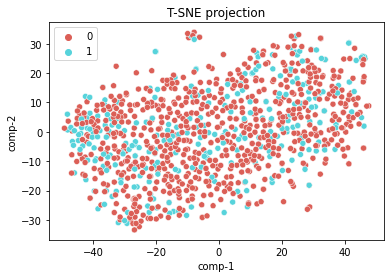

In [91]:
df = pd.DataFrame()
df["y"] = ans[1000:2000]
df["comp-1"] = X_tsne[:,0]
df["comp-2"] = X_tsne[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

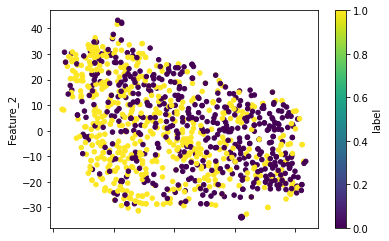

In [28]:
df = pd.DataFrame(dict(Feature_1=X_tsne[:,0], Feature_2=X_tsne[:,1], label=A_class[500:1500]))

df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='viridis')

In [421]:
A_class = tf.keras.utils.to_categorical(a_class)
V_class = tf.keras.utils.to_categorical(v_class)

In [422]:
num_folds = 5

In [423]:
from sklearn.utils import class_weight
a_class_weights = class_weight.compute_class_weight('balanced',np.unique(a_class),a_class)
v_class_weights = class_weight.compute_class_weight('balanced',np.unique(v_class),v_class)
a_sample_weights = np.zeros(shape=(len(A_class),))
for i in range(0,len(A_class)):
    if A_class[i][0] == 1:
        a_sample_weights[i] = a_class_weights[0]
    else:
        a_sample_weights[i] = a_class_weights[1]

In [300]:
correlations, losses = [], []
r = []
test_accuracy = []
conf_m = []
test_order_a = []
pred_order_a = []
confusion_a = []
test_macro_f1 = []
# K-fold Cross Validation model evaluation
kfold = KFold(n_splits=num_folds, shuffle=True)
for train, test in tqdm(kfold.split(coala_rep, A_class,a_sample_weights)):
     # Define the model architecture
    model = Sequential()
    model.add(layers.Dense(32, input_dim=coala_rep.shape[1], activation='relu', 
                           kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                           bias_regularizer=regularizers.L2(1e-4),
                           activity_regularizer=regularizers.L2(1e-5)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2, activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.00005),metrics=['accuracy'])
    a_checkpoint_filepath = './muse_coala_a_best_parameter'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=a_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
    
    # Fit data to model
    train_features = coala_rep[train]
    train_features = StandardScaler().fit_transform(train_features)
    # Fit data to model
    '''history = model.fit(train_features,
                        A_class[train],
                        validation_split = 0.1,
                        batch_size=64, 
                        epochs=120,
                       verbose=2,
                       callbacks=[model_checkpoint_callback])'''
    history = model.fit(train_features,
                        A_class[train],
                        validation_split = 0.1,
                        batch_size=64, 
                        sample_weight = a_sample_weights[train],
                        epochs=50,
                       verbose=2,
                       callbacks=[model_checkpoint_callback])
    test_features = coala_rep[test]
    test_features = StandardScaler().fit_transform(test_features)
    test_order_a.append(test)
    model.load_weights(a_checkpoint_filepath)
    pred = model.predict(test_features)
    pred_class = K.argmax(pred)
    ans = K.argmax(A_class[test])
    correct = 0
    for i in range(0,len(ans)):
        if(pred_class[i] == ans[i]):
            pred_order_a.append(1)
            correct += 1
            # 0: HV to HV
            # 1: LV to LV
            # 2: LV to HV
            # 3: HV to LV
            if ans[i] == 0:
                confusion_a.append(0)
            else:
                confusion_a.append(1)
        else:
            pred_order_a.append(0)
            if ans[i] == 0:
                confusion_a.append(2)
            else:
                confusion_a.append(3)   
    test_acc = correct/len(ans)
    test_accuracy.append(test_acc)
    conf_m.append(confusion_matrix(pred_class,ans))
    f1 = f1_score(ans, pred_class, average='macro')
    test_macro_f1.append(f1)
    #losses.append(model.evaluate(test_features, label_class[test], verbose=0))
    #r.append(np.corrcoef(label_class[test], pred.reshape(-1))[0,1])

0it [00:00, ?it/s]

Epoch 1/50
125/125 - 1s - loss: 0.9123 - accuracy: 0.5420 - val_loss: 0.5394 - val_accuracy: 0.6888
Epoch 2/50
125/125 - 0s - loss: 0.8427 - accuracy: 0.5824 - val_loss: 0.5375 - val_accuracy: 0.6787
Epoch 3/50
125/125 - 0s - loss: 0.8049 - accuracy: 0.5974 - val_loss: 0.5334 - val_accuracy: 0.6776
Epoch 4/50
125/125 - 0s - loss: 0.7893 - accuracy: 0.6123 - val_loss: 0.5268 - val_accuracy: 0.6764
Epoch 5/50
125/125 - 0s - loss: 0.7733 - accuracy: 0.6078 - val_loss: 0.5166 - val_accuracy: 0.6809
Epoch 6/50
125/125 - 0s - loss: 0.7569 - accuracy: 0.6188 - val_loss: 0.5093 - val_accuracy: 0.6911
Epoch 7/50
125/125 - 0s - loss: 0.7485 - accuracy: 0.6338 - val_loss: 0.5016 - val_accuracy: 0.6922
Epoch 8/50
125/125 - 0s - loss: 0.7391 - accuracy: 0.6293 - val_loss: 0.4990 - val_accuracy: 0.6967
Epoch 9/50
125/125 - 0s - loss: 0.7358 - accuracy: 0.6306 - val_loss: 0.4953 - val_accuracy: 0.7012
Epoch 10/50
125/125 - 0s - loss: 0.7140 - accuracy: 0.6332 - val_loss: 0.4895 - val_accuracy: 0.7046

1it [00:13, 14.00s/it]

Epoch 1/50
125/125 - 1s - loss: 0.9072 - accuracy: 0.5427 - val_loss: 0.5586 - val_accuracy: 0.6821
Epoch 2/50
125/125 - 0s - loss: 0.7987 - accuracy: 0.5953 - val_loss: 0.5372 - val_accuracy: 0.6855
Epoch 3/50
125/125 - 0s - loss: 0.7761 - accuracy: 0.6073 - val_loss: 0.5237 - val_accuracy: 0.6900
Epoch 4/50
125/125 - 0s - loss: 0.7574 - accuracy: 0.6121 - val_loss: 0.5164 - val_accuracy: 0.6922
Epoch 5/50
125/125 - 0s - loss: 0.7485 - accuracy: 0.6158 - val_loss: 0.5089 - val_accuracy: 0.6990
Epoch 6/50
125/125 - 0s - loss: 0.7308 - accuracy: 0.6252 - val_loss: 0.4985 - val_accuracy: 0.7012
Epoch 7/50
125/125 - 0s - loss: 0.7265 - accuracy: 0.6270 - val_loss: 0.4968 - val_accuracy: 0.7012
Epoch 8/50
125/125 - 0s - loss: 0.7098 - accuracy: 0.6372 - val_loss: 0.4943 - val_accuracy: 0.7057
Epoch 9/50
125/125 - 0s - loss: 0.7113 - accuracy: 0.6347 - val_loss: 0.4914 - val_accuracy: 0.7046
Epoch 10/50
125/125 - 0s - loss: 0.6971 - accuracy: 0.6427 - val_loss: 0.4905 - val_accuracy: 0.7091

2it [00:26, 13.32s/it]

Epoch 1/50
125/125 - 1s - loss: 0.8906 - accuracy: 0.5841 - val_loss: 0.6567 - val_accuracy: 0.5874
Epoch 2/50
125/125 - 0s - loss: 0.8261 - accuracy: 0.6123 - val_loss: 0.5872 - val_accuracy: 0.6719
Epoch 3/50
125/125 - 0s - loss: 0.7896 - accuracy: 0.6276 - val_loss: 0.5612 - val_accuracy: 0.7012
Epoch 4/50
125/125 - 0s - loss: 0.7851 - accuracy: 0.6356 - val_loss: 0.5424 - val_accuracy: 0.7193
Epoch 5/50
125/125 - 0s - loss: 0.7694 - accuracy: 0.6399 - val_loss: 0.5339 - val_accuracy: 0.7215
Epoch 6/50
125/125 - 0s - loss: 0.7654 - accuracy: 0.6436 - val_loss: 0.5211 - val_accuracy: 0.7260
Epoch 7/50
125/125 - 0s - loss: 0.7427 - accuracy: 0.6474 - val_loss: 0.5137 - val_accuracy: 0.7317
Epoch 8/50
125/125 - 0s - loss: 0.7291 - accuracy: 0.6530 - val_loss: 0.5066 - val_accuracy: 0.7339
Epoch 9/50
125/125 - 0s - loss: 0.7235 - accuracy: 0.6599 - val_loss: 0.5058 - val_accuracy: 0.7351
Epoch 10/50
125/125 - 0s - loss: 0.7256 - accuracy: 0.6513 - val_loss: 0.5040 - val_accuracy: 0.7384

3it [00:40, 13.42s/it]

Epoch 1/50
125/125 - 1s - loss: 0.9290 - accuracy: 0.5696 - val_loss: 0.6515 - val_accuracy: 0.6126
Epoch 2/50
125/125 - 0s - loss: 0.8316 - accuracy: 0.6193 - val_loss: 0.5915 - val_accuracy: 0.6926
Epoch 3/50
125/125 - 0s - loss: 0.8014 - accuracy: 0.6352 - val_loss: 0.5670 - val_accuracy: 0.7072
Epoch 4/50
125/125 - 0s - loss: 0.7887 - accuracy: 0.6396 - val_loss: 0.5541 - val_accuracy: 0.7151
Epoch 5/50
125/125 - 0s - loss: 0.7704 - accuracy: 0.6425 - val_loss: 0.5456 - val_accuracy: 0.7207
Epoch 6/50
125/125 - 0s - loss: 0.7594 - accuracy: 0.6488 - val_loss: 0.5337 - val_accuracy: 0.7342
Epoch 7/50
125/125 - 0s - loss: 0.7487 - accuracy: 0.6518 - val_loss: 0.5275 - val_accuracy: 0.7376
Epoch 8/50
125/125 - 0s - loss: 0.7410 - accuracy: 0.6531 - val_loss: 0.5222 - val_accuracy: 0.7354
Epoch 9/50
125/125 - 0s - loss: 0.7272 - accuracy: 0.6588 - val_loss: 0.5189 - val_accuracy: 0.7432
Epoch 10/50
125/125 - 0s - loss: 0.7260 - accuracy: 0.6628 - val_loss: 0.5133 - val_accuracy: 0.7489

4it [00:54, 13.51s/it]

Epoch 1/50
125/125 - 1s - loss: 0.8870 - accuracy: 0.5715 - val_loss: 0.5368 - val_accuracy: 0.6993
Epoch 2/50
125/125 - 0s - loss: 0.8238 - accuracy: 0.6139 - val_loss: 0.5207 - val_accuracy: 0.7218
Epoch 3/50
125/125 - 0s - loss: 0.7958 - accuracy: 0.6262 - val_loss: 0.5151 - val_accuracy: 0.7309
Epoch 4/50
125/125 - 0s - loss: 0.7857 - accuracy: 0.6293 - val_loss: 0.5090 - val_accuracy: 0.7275
Epoch 5/50
125/125 - 0s - loss: 0.7753 - accuracy: 0.6379 - val_loss: 0.5053 - val_accuracy: 0.7264
Epoch 6/50
125/125 - 0s - loss: 0.7566 - accuracy: 0.6421 - val_loss: 0.4947 - val_accuracy: 0.7331
Epoch 7/50
125/125 - 0s - loss: 0.7440 - accuracy: 0.6461 - val_loss: 0.4902 - val_accuracy: 0.7354
Epoch 8/50
125/125 - 0s - loss: 0.7370 - accuracy: 0.6429 - val_loss: 0.4848 - val_accuracy: 0.7387
Epoch 9/50
125/125 - 0s - loss: 0.7262 - accuracy: 0.6535 - val_loss: 0.4791 - val_accuracy: 0.7421
Epoch 10/50
125/125 - 0s - loss: 0.7242 - accuracy: 0.6485 - val_loss: 0.4786 - val_accuracy: 0.7432

5it [01:07, 13.54s/it]


In [301]:
total_conf = conf_m[0]*0
for i in range(0,len(test_accuracy)):
    print("Fold {}:".format(i+1))
    print("accuracy:", test_accuracy[i])
    print("Confusion Matrix:")
    print(conf_m[i])
    total_conf += conf_m[i]
    print('macro F1 score :', test_macro_f1[i])
print("Total Confusion Matrix:\n",total_conf)
print("Avg accuracy:",np.array(test_accuracy).mean())
print("Avg macro f1 score 0:",np.array(test_macro_f1).mean())

Fold 1:
accuracy: 0.7105500450856628
Confusion Matrix:
[[1135  148]
 [ 494  441]]
macro F1 score : 0.679136562256641
Fold 2:
accuracy: 0.69702434625789
Confusion Matrix:
[[1135  158]
 [ 514  411]]
macro F1 score : 0.6608923798525168
Fold 3:
accuracy: 0.7146077547339946
Confusion Matrix:
[[1165  141]
 [ 492  420]]
macro F1 score : 0.6783149681097418
Fold 4:
accuracy: 0.7009472259810555
Confusion Matrix:
[[1163  147]
 [ 516  391]]
macro F1 score : 0.6596815775490523
Fold 5:
accuracy: 0.7090663058186739
Confusion Matrix:
[[1143  149]
 [ 496  429]]
macro F1 score : 0.6753984354729641
Total Confusion Matrix:
 [[5741  743]
 [2512 2092]]
Avg accuracy: 0.7064391355754553
Avg macro f1 score 0: 0.6706847846481832


In [43]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output = get_3rd_layer_output(test_features)[0]

In [44]:
print()

[[-0.32491034 -0.24216357 -0.2348811  ...  0.9307846  -0.21586591
  -0.8186761 ]
 [-0.32491034 -0.24216357  2.002058   ... -0.1846664  -0.8052672
  -0.877278  ]
 [-0.32491034 -0.24216357 -0.2348811  ...  1.0987393   0.6710719
  -0.877278  ]
 ...
 [ 1.868597    1.2796481   1.6940982  ... -0.80083835 -0.8052672
  -0.877278  ]
 [ 2.6561713   1.2618473   2.138969   ... -0.80083835 -0.8052672
  -0.596013  ]
 [-0.32491034  0.1142121   2.1402512  ... -0.80083835  1.1010544
  -0.877278  ]]


In [81]:
X_tsne = TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(layer_output[1000:2000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.380425
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.364563
[t-SNE] KL divergence after 1000 iterations: 1.570075


[Text(0.5, 1.0, 'T-SNE projection')]

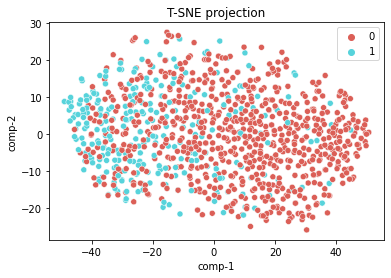

In [82]:
df = pd.DataFrame()
df["y"] = ans[1000:2000]
df["comp-1"] = X_tsne[:,0]
df["comp-2"] = X_tsne[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

In [99]:
correlations, losses = [], []
r = []
test_accuracy = []
conf_m = []
test_order_v = []
pred_order_v = []
confusion_v = []
# K-fold Cross Validation model evaluation
kfold = KFold(n_splits=num_folds, shuffle=True)
for train, test in tqdm(kfold.split(coala_rep, V_class)):
     # Define the model architecture
    model = Sequential()
    model.add(layers.Dense(32, input_dim=coala_rep.shape[1], activation='relu', 
                           kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                           bias_regularizer=regularizers.L2(1e-4),
                           activity_regularizer=regularizers.L2(1e-5)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(2, activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.00005),metrics=['accuracy'])
    v_checkpoint_filepath = './muse_coala_a_best_parameter'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=v_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
    
    # Fit data to model
    train_features = coala_rep[train]
    train_features = StandardScaler().fit_transform(train_features)
    # Fit data to model
    history = model.fit(train_features,
                        V_class[train],
                        validation_split = 0.1,
                        batch_size=64, 
                        epochs=120,
                       verbose=2,
                       callbacks=[model_checkpoint_callback])
    test_features = coala_rep[test]
    test_features = StandardScaler().fit_transform(test_features)
    test_order_v.append(test)
    model.load_weights(v_checkpoint_filepath)
    pred = model.predict(test_features)
    pred_class = K.argmax(pred)
    ans = K.argmax(V_class[test])
    correct = 0
    for i in range(0,len(ans)):
        if(pred_class[i] == ans[i]):
            pred_order_v.append(1)
            correct += 1
            # 0: HV to HV
            # 1: LV to LV
            # 2: LV to HV
            # 3: HV to LV
            if ans[i] == 0:
                confusion_v.append(0)
            else:
                confusion_v.append(1)
        else:
            pred_order_v.append(0)
            if ans[i] == 0:
                confusion_v.append(2)
            else:
                confusion_v.append(3)   
    test_acc = correct/len(ans)
    test_accuracy.append(test_acc)
    conf_m.append(confusion_matrix(pred_class,ans))
    #losses.append(model.evaluate(test_features, label_class[test], verbose=0))
    #r.append(np.corrcoef(label_class[test], pred.reshape(-1))[0,1])


0it [00:00, ?it/s]

Epoch 1/120
130/130 - 1s - loss: 1.0006 - accuracy: 0.5189 - val_loss: 0.8930 - val_accuracy: 0.4176
Epoch 2/120
130/130 - 0s - loss: 0.9502 - accuracy: 0.5407 - val_loss: 0.8189 - val_accuracy: 0.4902
Epoch 3/120
130/130 - 0s - loss: 0.9161 - accuracy: 0.5556 - val_loss: 0.7850 - val_accuracy: 0.5249
Epoch 4/120
130/130 - 0s - loss: 0.8987 - accuracy: 0.5522 - val_loss: 0.7654 - val_accuracy: 0.5271
Epoch 5/120
130/130 - 0s - loss: 0.8714 - accuracy: 0.5719 - val_loss: 0.7462 - val_accuracy: 0.5553
Epoch 6/120
130/130 - 0s - loss: 0.8520 - accuracy: 0.5829 - val_loss: 0.7308 - val_accuracy: 0.5705
Epoch 7/120
130/130 - 0s - loss: 0.8454 - accuracy: 0.5885 - val_loss: 0.7178 - val_accuracy: 0.5868
Epoch 8/120
130/130 - 0s - loss: 0.8344 - accuracy: 0.5947 - val_loss: 0.7085 - val_accuracy: 0.5889
Epoch 9/120
130/130 - 0s - loss: 0.8226 - accuracy: 0.5913 - val_loss: 0.6978 - val_accuracy: 0.6020
Epoch 10/120
130/130 - 0s - loss: 0.8128 - accuracy: 0.5953 - val_loss: 0.6892 - val_accura

Epoch 82/120
130/130 - 0s - loss: 0.5692 - accuracy: 0.7319 - val_loss: 0.5131 - val_accuracy: 0.8102
Epoch 83/120
130/130 - 0s - loss: 0.5635 - accuracy: 0.7346 - val_loss: 0.5132 - val_accuracy: 0.8059
Epoch 84/120
130/130 - 0s - loss: 0.5663 - accuracy: 0.7328 - val_loss: 0.5139 - val_accuracy: 0.8080
Epoch 85/120
130/130 - 0s - loss: 0.5632 - accuracy: 0.7383 - val_loss: 0.5111 - val_accuracy: 0.8145
Epoch 86/120
130/130 - 0s - loss: 0.5661 - accuracy: 0.7327 - val_loss: 0.5145 - val_accuracy: 0.8048
Epoch 87/120
130/130 - 0s - loss: 0.5611 - accuracy: 0.7372 - val_loss: 0.5142 - val_accuracy: 0.8059
Epoch 88/120
130/130 - 0s - loss: 0.5587 - accuracy: 0.7392 - val_loss: 0.5129 - val_accuracy: 0.8113
Epoch 89/120
130/130 - 0s - loss: 0.5584 - accuracy: 0.7391 - val_loss: 0.5129 - val_accuracy: 0.8113
Epoch 90/120
130/130 - 0s - loss: 0.5562 - accuracy: 0.7430 - val_loss: 0.5138 - val_accuracy: 0.8069
Epoch 91/120
130/130 - 0s - loss: 0.5537 - accuracy: 0.7416 - val_loss: 0.5139 - v


1it [00:53, 53.82s/it]

Epoch 1/120
130/130 - 1s - loss: 1.0597 - accuracy: 0.5047 - val_loss: 0.7979 - val_accuracy: 0.5651
Epoch 2/120
130/130 - 0s - loss: 1.0039 - accuracy: 0.5202 - val_loss: 0.8208 - val_accuracy: 0.5271
Epoch 3/120
130/130 - 0s - loss: 0.9492 - accuracy: 0.5315 - val_loss: 0.8101 - val_accuracy: 0.5260
Epoch 4/120
130/130 - 0s - loss: 0.9396 - accuracy: 0.5305 - val_loss: 0.7921 - val_accuracy: 0.5336
Epoch 5/120
130/130 - 0s - loss: 0.9153 - accuracy: 0.5437 - val_loss: 0.7684 - val_accuracy: 0.5531
Epoch 6/120
130/130 - 0s - loss: 0.8864 - accuracy: 0.5604 - val_loss: 0.7427 - val_accuracy: 0.5738
Epoch 7/120
130/130 - 0s - loss: 0.8764 - accuracy: 0.5548 - val_loss: 0.7342 - val_accuracy: 0.5672
Epoch 8/120
130/130 - 0s - loss: 0.8602 - accuracy: 0.5562 - val_loss: 0.7166 - val_accuracy: 0.5889
Epoch 9/120
130/130 - 0s - loss: 0.8519 - accuracy: 0.5676 - val_loss: 0.7041 - val_accuracy: 0.5954
Epoch 10/120
130/130 - 0s - loss: 0.8287 - accuracy: 0.5786 - val_loss: 0.6854 - val_accura

Epoch 82/120
130/130 - 0s - loss: 0.5693 - accuracy: 0.7301 - val_loss: 0.4872 - val_accuracy: 0.8297
Epoch 83/120
130/130 - 0s - loss: 0.5636 - accuracy: 0.7338 - val_loss: 0.4859 - val_accuracy: 0.8286
Epoch 84/120
130/130 - 0s - loss: 0.5603 - accuracy: 0.7401 - val_loss: 0.4850 - val_accuracy: 0.8265
Epoch 85/120
130/130 - 0s - loss: 0.5634 - accuracy: 0.7338 - val_loss: 0.4863 - val_accuracy: 0.8297
Epoch 86/120
130/130 - 0s - loss: 0.5611 - accuracy: 0.7361 - val_loss: 0.4870 - val_accuracy: 0.8308
Epoch 87/120
130/130 - 0s - loss: 0.5609 - accuracy: 0.7331 - val_loss: 0.4878 - val_accuracy: 0.8275
Epoch 88/120
130/130 - 0s - loss: 0.5588 - accuracy: 0.7373 - val_loss: 0.4847 - val_accuracy: 0.8319
Epoch 89/120
130/130 - 0s - loss: 0.5634 - accuracy: 0.7292 - val_loss: 0.4850 - val_accuracy: 0.8319
Epoch 90/120
130/130 - 0s - loss: 0.5630 - accuracy: 0.7325 - val_loss: 0.4862 - val_accuracy: 0.8265
Epoch 91/120
130/130 - 0s - loss: 0.5578 - accuracy: 0.7370 - val_loss: 0.4856 - v


2it [01:48, 54.42s/it]

Epoch 1/120
130/130 - 1s - loss: 0.9793 - accuracy: 0.5105 - val_loss: 0.8113 - val_accuracy: 0.5228
Epoch 2/120
130/130 - 0s - loss: 0.9401 - accuracy: 0.5272 - val_loss: 0.7968 - val_accuracy: 0.5423
Epoch 3/120
130/130 - 0s - loss: 0.9057 - accuracy: 0.5435 - val_loss: 0.7774 - val_accuracy: 0.5618
Epoch 4/120
130/130 - 0s - loss: 0.8808 - accuracy: 0.5540 - val_loss: 0.7602 - val_accuracy: 0.5607
Epoch 5/120
130/130 - 0s - loss: 0.8615 - accuracy: 0.5617 - val_loss: 0.7451 - val_accuracy: 0.5694
Epoch 6/120
130/130 - 0s - loss: 0.8503 - accuracy: 0.5752 - val_loss: 0.7275 - val_accuracy: 0.5868
Epoch 7/120
130/130 - 0s - loss: 0.8345 - accuracy: 0.5789 - val_loss: 0.7135 - val_accuracy: 0.6041
Epoch 8/120
130/130 - 0s - loss: 0.8207 - accuracy: 0.5915 - val_loss: 0.7093 - val_accuracy: 0.6139
Epoch 9/120
130/130 - 0s - loss: 0.8025 - accuracy: 0.5906 - val_loss: 0.6952 - val_accuracy: 0.6377
Epoch 10/120
130/130 - 0s - loss: 0.8028 - accuracy: 0.5959 - val_loss: 0.6784 - val_accura

Epoch 82/120
130/130 - 0s - loss: 0.5652 - accuracy: 0.7367 - val_loss: 0.5013 - val_accuracy: 0.8156
Epoch 83/120
130/130 - 0s - loss: 0.5566 - accuracy: 0.7414 - val_loss: 0.5013 - val_accuracy: 0.8134
Epoch 84/120
130/130 - 0s - loss: 0.5602 - accuracy: 0.7381 - val_loss: 0.5048 - val_accuracy: 0.8113
Epoch 85/120
130/130 - 0s - loss: 0.5599 - accuracy: 0.7391 - val_loss: 0.5021 - val_accuracy: 0.8210
Epoch 86/120
130/130 - 0s - loss: 0.5561 - accuracy: 0.7372 - val_loss: 0.5003 - val_accuracy: 0.8167
Epoch 87/120
130/130 - 0s - loss: 0.5572 - accuracy: 0.7430 - val_loss: 0.5011 - val_accuracy: 0.8145
Epoch 88/120
130/130 - 0s - loss: 0.5587 - accuracy: 0.7343 - val_loss: 0.4996 - val_accuracy: 0.8167
Epoch 89/120
130/130 - 0s - loss: 0.5527 - accuracy: 0.7422 - val_loss: 0.5040 - val_accuracy: 0.8080
Epoch 90/120
130/130 - 0s - loss: 0.5475 - accuracy: 0.7399 - val_loss: 0.5015 - val_accuracy: 0.8113
Epoch 91/120
130/130 - 0s - loss: 0.5539 - accuracy: 0.7374 - val_loss: 0.4999 - v


3it [02:42, 54.13s/it]

Epoch 1/120
130/130 - 1s - loss: 0.9779 - accuracy: 0.5335 - val_loss: 0.8900 - val_accuracy: 0.4544
Epoch 2/120
130/130 - 0s - loss: 0.9307 - accuracy: 0.5505 - val_loss: 0.8184 - val_accuracy: 0.5065
Epoch 3/120
130/130 - 0s - loss: 0.9072 - accuracy: 0.5530 - val_loss: 0.7837 - val_accuracy: 0.5412
Epoch 4/120
130/130 - 0s - loss: 0.8860 - accuracy: 0.5615 - val_loss: 0.7667 - val_accuracy: 0.5542
Epoch 5/120
130/130 - 0s - loss: 0.8655 - accuracy: 0.5678 - val_loss: 0.7542 - val_accuracy: 0.5683
Epoch 6/120
130/130 - 0s - loss: 0.8513 - accuracy: 0.5740 - val_loss: 0.7322 - val_accuracy: 0.5835
Epoch 7/120
130/130 - 0s - loss: 0.8328 - accuracy: 0.5848 - val_loss: 0.7277 - val_accuracy: 0.5944
Epoch 8/120
130/130 - 0s - loss: 0.8301 - accuracy: 0.5825 - val_loss: 0.7151 - val_accuracy: 0.6074
Epoch 9/120
130/130 - 0s - loss: 0.8119 - accuracy: 0.5941 - val_loss: 0.7054 - val_accuracy: 0.6171
Epoch 10/120
130/130 - 0s - loss: 0.8013 - accuracy: 0.5991 - val_loss: 0.7010 - val_accura

Epoch 82/120
130/130 - 0s - loss: 0.5631 - accuracy: 0.7349 - val_loss: 0.4945 - val_accuracy: 0.8189
Epoch 83/120
130/130 - 0s - loss: 0.5642 - accuracy: 0.7337 - val_loss: 0.4975 - val_accuracy: 0.8167
Epoch 84/120
130/130 - 0s - loss: 0.5636 - accuracy: 0.7307 - val_loss: 0.4974 - val_accuracy: 0.8178
Epoch 85/120
130/130 - 0s - loss: 0.5634 - accuracy: 0.7316 - val_loss: 0.5011 - val_accuracy: 0.8113
Epoch 86/120
130/130 - 0s - loss: 0.5591 - accuracy: 0.7297 - val_loss: 0.4976 - val_accuracy: 0.8189
Epoch 87/120
130/130 - 0s - loss: 0.5601 - accuracy: 0.7310 - val_loss: 0.5020 - val_accuracy: 0.8113
Epoch 88/120
130/130 - 0s - loss: 0.5561 - accuracy: 0.7321 - val_loss: 0.4983 - val_accuracy: 0.8189
Epoch 89/120
130/130 - 0s - loss: 0.5567 - accuracy: 0.7331 - val_loss: 0.4968 - val_accuracy: 0.8178
Epoch 90/120
130/130 - 0s - loss: 0.5573 - accuracy: 0.7367 - val_loss: 0.5006 - val_accuracy: 0.8178
Epoch 91/120
130/130 - 0s - loss: 0.5554 - accuracy: 0.7367 - val_loss: 0.4986 - v


4it [03:36, 54.09s/it]

Epoch 1/120
130/130 - 1s - loss: 1.0373 - accuracy: 0.4808 - val_loss: 0.7183 - val_accuracy: 0.5683
Epoch 2/120
130/130 - 0s - loss: 0.9786 - accuracy: 0.5081 - val_loss: 0.7517 - val_accuracy: 0.5358
Epoch 3/120
130/130 - 0s - loss: 0.9448 - accuracy: 0.5217 - val_loss: 0.7470 - val_accuracy: 0.5380
Epoch 4/120
130/130 - 0s - loss: 0.9216 - accuracy: 0.5255 - val_loss: 0.7326 - val_accuracy: 0.5510
Epoch 5/120
130/130 - 0s - loss: 0.8860 - accuracy: 0.5443 - val_loss: 0.7178 - val_accuracy: 0.5662
Epoch 6/120
130/130 - 0s - loss: 0.8819 - accuracy: 0.5495 - val_loss: 0.7068 - val_accuracy: 0.5683
Epoch 7/120
130/130 - 0s - loss: 0.8625 - accuracy: 0.5530 - val_loss: 0.6890 - val_accuracy: 0.5954
Epoch 8/120
130/130 - 0s - loss: 0.8416 - accuracy: 0.5678 - val_loss: 0.6794 - val_accuracy: 0.6063
Epoch 9/120
130/130 - 0s - loss: 0.8353 - accuracy: 0.5747 - val_loss: 0.6702 - val_accuracy: 0.6280
Epoch 10/120
130/130 - 0s - loss: 0.8135 - accuracy: 0.5810 - val_loss: 0.6622 - val_accura

Epoch 82/120
130/130 - 0s - loss: 0.5607 - accuracy: 0.7380 - val_loss: 0.4774 - val_accuracy: 0.8384
Epoch 83/120
130/130 - 0s - loss: 0.5680 - accuracy: 0.7296 - val_loss: 0.4770 - val_accuracy: 0.8384
Epoch 84/120
130/130 - 0s - loss: 0.5629 - accuracy: 0.7342 - val_loss: 0.4786 - val_accuracy: 0.8416
Epoch 85/120
130/130 - 0s - loss: 0.5638 - accuracy: 0.7372 - val_loss: 0.4805 - val_accuracy: 0.8373
Epoch 86/120
130/130 - 0s - loss: 0.5600 - accuracy: 0.7344 - val_loss: 0.4794 - val_accuracy: 0.8373
Epoch 87/120
130/130 - 0s - loss: 0.5602 - accuracy: 0.7337 - val_loss: 0.4783 - val_accuracy: 0.8373
Epoch 88/120
130/130 - 0s - loss: 0.5566 - accuracy: 0.7342 - val_loss: 0.4802 - val_accuracy: 0.8406
Epoch 89/120
130/130 - 0s - loss: 0.5563 - accuracy: 0.7357 - val_loss: 0.4779 - val_accuracy: 0.8395
Epoch 90/120
130/130 - 0s - loss: 0.5549 - accuracy: 0.7383 - val_loss: 0.4758 - val_accuracy: 0.8384
Epoch 91/120
130/130 - 0s - loss: 0.5560 - accuracy: 0.7396 - val_loss: 0.4750 - v

5it [04:32, 54.49s/it]


In [426]:
int_df

,lastfm_url_x,track_x,artist_x,seeds_x,number_of_emotion_tags_x,valence_tags_x,arousal_tags_x,dominance_tags_x,mbid_x,spotify_id,...,lastfm_url_y,track_y,artist_y,seeds_y,number_of_emotion_tags_y,valence_tags_y,arousal_tags_y,dominance_tags_y,mbid_y,genre_y
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,...,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,rap
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,...,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,metal
2,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,['aggressive'],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,...,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,['aggressive'],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,metal
3,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,"['aggressive', 'angry', 'bitter']",20,3.737211,5.610204,4.626735,4435982c-b83e-4daa-af2b-9f3430036bb7,104YdibC7VQy78xAVmgRYr,...,https://www.last.fm/music/fiona%2bapple/_/limp,Limp,Fiona Apple,"['aggressive', 'angry', 'bitter']",20,3.737211,5.610204,4.626735,4435982c-b83e-4daa-af2b-9f3430036bb7,singer-songwriter
4,https://www.last.fm/music/metallica/_/sweet%2b...,Sweet Amber,Metallica,['aggressive'],4,3.582759,5.757241,5.340000,fe1cc051-faa7-4953-b331-f6196cd3ddae,5fU6qjmD38P90BMsuqpiuU,...,https://www.last.fm/music/metallica/_/sweet%2b...,Sweet Amber,Metallica,['aggressive'],4,3.582759,5.757241,5.340000,fe1cc051-faa7-4953-b331-f6196cd3ddae,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11520,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,5Knl7BTPCME3Kh5WxctWLU,...,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,pop
11521,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,5Knl7BTPCME3Kh5WxctWLU,...,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,pop
11522,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,5Knl7BTPCME3Kh5WxctWLU,...,https://www.last.fm/music/pet%2bshop%2bboys/_/...,Do I Have To?,Pet Shop Boys,['cynical'],6,3.680274,3.877534,4.406781,7ba30729-8ea8-4696-a54b-b3fb73db6ba8,pop
11523,https://www.last.fm/music/herbie%2bman/_/water...,Watermelon man,Herbie Man,['amiable'],1,6.700000,2.850000,6.140000,b9947eeb-c68a-43d1-8902-89e3db2302c3,2zQl59dZMzwhrmeSBEgiXY,...,https://www.last.fm/music/herbie%2bman/_/water...,Watermelon man,Herbie Man,['amiable'],1,6.700000,2.850000,6.140000,b9947eeb-c68a-43d1-8902-89e3db2302c3,jazz


In [444]:
'''data = int_df.loc[:,[ 'tempo_x', 'key_x', 'loudness', 'time_signature',
       'duration_ms_x', 'acousticness', 'speechiness',
       'liveness', 'energy_x', 'instrumentalness', 'valence_x']]
data'''

,tempo_x,key_x,loudness,time_signature,duration_ms_x,acousticness,speechiness,liveness,energy_x,instrumentalness,valence_x
0,171.297,1.0,-3.237,4,297893,0.062200,0.1860,0.0816,0.853,0.000000,0.102
1,185.252,2.0,-2.642,4,441133,0.001310,0.0678,0.0953,0.949,0.022800,0.498
2,156.100,4.0,-3.269,4,197293,0.000008,0.0789,0.3210,0.951,0.000005,0.627
3,119.992,0.0,-10.456,4,209800,0.116000,0.0499,0.4050,0.515,0.000168,0.343
4,93.213,0.0,-5.335,4,327133,0.001140,0.0625,0.2260,0.913,0.000107,0.413
...,...,...,...,...,...,...,...,...,...,...,...
11520,118.022,5.0,-5.240,4,260413,0.129000,0.0336,0.1590,0.875,0.001260,0.925
11521,118.022,5.0,-5.240,4,260413,0.129000,0.0336,0.1590,0.875,0.001260,0.925
11522,118.022,5.0,-5.240,4,260413,0.129000,0.0336,0.1590,0.875,0.001260,0.925
11523,146.939,1.0,-11.190,4,388960,0.262000,0.0588,0.0785,0.414,0.111000,0.719


In [450]:
data = int_df.loc[:,["energy_x","valence_x","speechiness","acousticness","instrumentalness","loudness"]]
data

,energy_x,valence_x,speechiness,acousticness,instrumentalness,loudness
0,0.853,0.102,0.1860,0.062200,0.000000,-3.237
1,0.949,0.498,0.0678,0.001310,0.022800,-2.642
2,0.951,0.627,0.0789,0.000008,0.000005,-3.269
3,0.515,0.343,0.0499,0.116000,0.000168,-10.456
4,0.913,0.413,0.0625,0.001140,0.000107,-5.335
...,...,...,...,...,...,...
11520,0.875,0.925,0.0336,0.129000,0.001260,-5.240
11521,0.875,0.925,0.0336,0.129000,0.001260,-5.240
11522,0.875,0.925,0.0336,0.129000,0.001260,-5.240
11523,0.414,0.719,0.0588,0.262000,0.111000,-11.190


In [451]:
spotify = data
#spotify_features=(spotify-spotify.min())/(spotify.max()-spotify.min())
spotify_features = spotify

In [452]:
spotify_features = spotify_features.to_numpy()
spotify_features.shape

(11525, 6)

In [446]:
'''key_dummies = pd.get_dummies(data.key_x,prefix='key',dtype=float)
spotify = pd.concat([data, key_dummies], axis=1)
spotify = spotify.drop(columns = ['key_x'])
spotify'''

,tempo_x,loudness,time_signature,duration_ms_x,acousticness,speechiness,liveness,energy_x,instrumentalness,valence_x,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,171.297,-3.237,4,297893,0.062200,0.1860,0.0816,0.853,0.000000,0.102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,185.252,-2.642,4,441133,0.001310,0.0678,0.0953,0.949,0.022800,0.498,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,156.100,-3.269,4,197293,0.000008,0.0789,0.3210,0.951,0.000005,0.627,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,119.992,-10.456,4,209800,0.116000,0.0499,0.4050,0.515,0.000168,0.343,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,93.213,-5.335,4,327133,0.001140,0.0625,0.2260,0.913,0.000107,0.413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11520,118.022,-5.240,4,260413,0.129000,0.0336,0.1590,0.875,0.001260,0.925,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11521,118.022,-5.240,4,260413,0.129000,0.0336,0.1590,0.875,0.001260,0.925,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11522,118.022,-5.240,4,260413,0.129000,0.0336,0.1590,0.875,0.001260,0.925,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11523,146.939,-11.190,4,388960,0.262000,0.0588,0.0785,0.414,0.111000,0.719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [447]:
'''spotify_features = spotify.to_numpy()
spotify_features.shape'''

(11525, 22)

In [ ]:
#spotify = spotify.loc[:,["valence","energy","key","valence","mode","tempo",]]

In [25]:
'''spotify_features=(spotify-spotify.min())/(spotify.max()-spotify.min())
spotify_features'''

,popularity,danceability,energy,valence,mode,tempo,valence,energy,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,0.919540,0.582485,0.852933,0.103870,1.0,0.777905,0.103870,0.852933,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.551724,0.253564,0.948977,0.507128,0.0,0.841278,0.507128,0.948977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.574713,0.431772,0.950978,0.638493,1.0,0.708891,0.638493,0.950978,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.425287,0.785132,0.514780,0.349287,1.0,0.544915,0.349287,0.514780,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.367816,0.487780,0.912961,0.420570,1.0,0.423305,0.420570,0.912961,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11520,0.482759,0.724033,0.874943,0.941955,1.0,0.535969,0.941955,0.874943,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11521,0.482759,0.724033,0.874943,0.941955,1.0,0.535969,0.941955,0.874943,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11522,0.482759,0.724033,0.874943,0.941955,1.0,0.535969,0.941955,0.874943,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11523,0.620690,0.737271,0.413734,0.732179,1.0,0.667289,0.732179,0.413734,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
int_df

,spotify_id,tempo_x,key_x,mode_x,loudness,time_signature,duration_ms_x,danceability_x,acousticness,speechiness,...,id,popularity,release,danceability_y,energy_y,key_y,mode_y,valence_y,tempo_y,duration_ms_y
0,4xkOaSrkexMciUUogZKVTS,171.447,1,1,-3.237,4,297787,0.548,0.062200,0.1860,...,9c7aQJ1qeGfyLNEm,80.0,2002,0.572,0.853,1.0,1.0,0.102,171.297,297893
1,3fOc9x06lKJBhz435mInlH,185.252,2,0,-2.642,4,441133,0.249,0.001310,0.0678,...,DaGhOsU4uWfVvsGB,48.0,2003,0.249,0.949,2.0,0.0,0.498,185.252,441133
2,4Q1w4Ryyi8KNxxaFlOQClK,156.103,6,1,-3.269,4,197293,0.431,0.000008,0.0789,...,2HEDUMxUacma646T,50.0,2004,0.424,0.951,4.0,1.0,0.627,156.100,197293
3,104YdibC7VQy78xAVmgRYr,119.961,9,0,-10.456,4,209800,0.771,0.116000,0.0499,...,AK9xyl9cbAnsncWA,37.0,1999,0.771,0.515,0.0,1.0,0.343,119.992,209800
4,5fU6qjmD38P90BMsuqpiuU,93.213,0,1,-5.335,4,327133,0.479,0.001140,0.0625,...,vN5Q2VvaGjH5LbfF,32.0,2003,0.479,0.913,0.0,1.0,0.413,93.213,327133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,DuIceziNklxQWBxr,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11084,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,YEWH2dMDiRCIJy7F,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11085,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,y6QD3MSUPdC87Pgb,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11086,2zQl59dZMzwhrmeSBEgiXY,146.939,1,1,-11.190,4,388960,0.724,0.262000,0.0588,...,0LwxuBXTAocDysDB,54.0,1973,0.724,0.414,1.0,1.0,0.719,146.939,388960


In [284]:
'''data = int_df.loc[:,["danceability_x","valence_x","acousticness","loudness"]]
data'''

,danceability_x,valence_x,acousticness,loudness
0,0.548,0.100,0.062200,-3.237
1,0.249,0.498,0.001310,-2.642
2,0.431,0.585,0.000008,-3.269
3,0.771,0.343,0.116000,-10.456
4,0.479,0.413,0.001140,-5.335
...,...,...,...,...
11083,0.711,0.925,0.129000,-5.240
11084,0.711,0.925,0.129000,-5.240
11085,0.711,0.925,0.129000,-5.240
11086,0.724,0.719,0.262000,-11.190


In [285]:
'''spotify = data
#spotify_features=(spotify-spotify.min())/(spotify.max()-spotify.min())
spotify_features = spotify'''

In [286]:
'''spotify_features = spotify_features.to_numpy()
spotify_features.shape'''

(11088, 4)

In [266]:
spotify_tsne = TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(spotify_features[1000:2000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.444121
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.685326
[t-SNE] KL divergence after 1000 iterations: 0.154856


[Text(0.5, 1.0, 'T-SNE projection')]

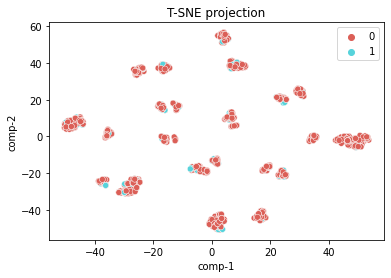

In [267]:
df = pd.DataFrame()
df["y"] = a_class[1000:2000]
df["comp-1"] = spotify_tsne[:,0]
df["comp-2"] = spotify_tsne[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

In [377]:
from sklearn.utils import class_weight
a_class_weights = class_weight.compute_class_weight('balanced',np.unique(a_class),a_class)
v_class_weights = class_weight.compute_class_weight('balanced',np.unique(v_class),v_class)
a_sample_weights = np.zeros(shape=(len(A_class),))
v_sample_weights = np.zeros(shape=(len(V_class),))
for i in range(0,len(A_class)):
    if A_class[i][0] == 1:
        a_sample_weights[i] = a_class_weights[0]
    else:
        a_sample_weights[i] = a_class_weights[1]

for i in range(0,len(V_class)):
    if V_class[i][0] == 1:
        v_sample_weights[i] = v_class_weights[0]
    else:
        v_sample_weights[i] = v_class_weights[1]

In [312]:
correlations, losses = [], []
r = []
test_accuracy = []
conf_m = []
test_order_a = []
pred_order_a = []
confusion_a = []
test_macro_f1 = []
# K-fold Cross Validation model evaluation
kfold = KFold(n_splits=num_folds, shuffle=True)
for train, test in tqdm(kfold.split(spotify_features,A_class,a_sample_weights)):
     # Define the model architecture
    model = Sequential()
    model.add(layers.Dense(128, input_dim=spotify_features.shape[1], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.0005),metrics=['accuracy'])
    a_checkpoint_filepath = './muse_spotify_a_best_parameter'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=a_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    
    # Fit data to model
    train_features = spotify_features[train]
    train_features = StandardScaler().fit_transform(train_features)
    # Fit data to model
    history = model.fit(train_features,
                        A_class[train],
                        validation_split = 0.1,
                        batch_size=64, 
                        sample_weight = a_sample_weights[train],
                        epochs=50,
                       verbose=2,
                       callbacks=[model_checkpoint_callback])
    test_features = spotify_features[test]
    test_features = StandardScaler().fit_transform(test_features)
    test_order_a.append(test)
    model.load_weights(a_checkpoint_filepath)
    pred = model.predict(test_features)
    pred_class = K.argmax(pred)
    ans = K.argmax(A_class[test])
    correct = 0
    for i in range(0,len(ans)):
        if(pred_class[i] == ans[i]):
            pred_order_a.append(1)
            correct += 1
            # 0: HV to HV
            # 1: LV to LV
            # 2: LV to HV
            # 3: HV to LV
            if ans[i] == 0:
                confusion_a.append(0)
            else:
                confusion_a.append(1)
        else:
            pred_order_a.append(0)
            if ans[i] == 0:
                confusion_a.append(2)
            else:
                confusion_a.append(3)   
    test_acc = correct/len(ans)
    test_accuracy.append(test_acc)
    conf_m.append(confusion_matrix(pred_class,ans))
    f1 = f1_score(ans, pred_class, average='macro')
    test_macro_f1.append(f1)
    #losses.append(model.evaluate(test_features, label_class[test], verbose=0))
    #r.append(np.corrcoef(label_class[test], pred.reshape(-1))[0,1])

0it [00:00, ?it/s]

Epoch 1/50
125/125 - 1s - loss: 0.7043 - accuracy: 0.6702 - val_loss: 0.5612 - val_accuracy: 0.6528
Epoch 2/50
125/125 - 0s - loss: 0.6381 - accuracy: 0.6774 - val_loss: 0.5181 - val_accuracy: 0.7001
Epoch 3/50
125/125 - 0s - loss: 0.6166 - accuracy: 0.6837 - val_loss: 0.4832 - val_accuracy: 0.7193
Epoch 4/50
125/125 - 0s - loss: 0.6096 - accuracy: 0.6827 - val_loss: 0.4784 - val_accuracy: 0.7249
Epoch 5/50
125/125 - 0s - loss: 0.6055 - accuracy: 0.6826 - val_loss: 0.4805 - val_accuracy: 0.7272
Epoch 6/50
125/125 - 0s - loss: 0.5963 - accuracy: 0.6922 - val_loss: 0.4756 - val_accuracy: 0.7317
Epoch 7/50
125/125 - 0s - loss: 0.5882 - accuracy: 0.6896 - val_loss: 0.4733 - val_accuracy: 0.7249
Epoch 8/50
125/125 - 0s - loss: 0.5897 - accuracy: 0.6926 - val_loss: 0.4714 - val_accuracy: 0.7272
Epoch 9/50
125/125 - 0s - loss: 0.5873 - accuracy: 0.6862 - val_loss: 0.4689 - val_accuracy: 0.7328
Epoch 10/50
125/125 - 0s - loss: 0.5869 - accuracy: 0.6901 - val_loss: 0.4686 - val_accuracy: 0.7373

1it [00:11, 11.33s/it]

Epoch 1/50
125/125 - 1s - loss: 0.6798 - accuracy: 0.6594 - val_loss: 0.5381 - val_accuracy: 0.7227
Epoch 2/50
125/125 - 0s - loss: 0.6355 - accuracy: 0.6729 - val_loss: 0.4949 - val_accuracy: 0.7294
Epoch 3/50
125/125 - 0s - loss: 0.6236 - accuracy: 0.6786 - val_loss: 0.4685 - val_accuracy: 0.7418
Epoch 4/50
125/125 - 0s - loss: 0.6089 - accuracy: 0.6825 - val_loss: 0.4651 - val_accuracy: 0.7497
Epoch 5/50
125/125 - 0s - loss: 0.6077 - accuracy: 0.6799 - val_loss: 0.4526 - val_accuracy: 0.7486
Epoch 6/50
125/125 - 0s - loss: 0.5997 - accuracy: 0.6880 - val_loss: 0.4645 - val_accuracy: 0.7441
Epoch 7/50
125/125 - 0s - loss: 0.5956 - accuracy: 0.6885 - val_loss: 0.4537 - val_accuracy: 0.7441
Epoch 8/50
125/125 - 0s - loss: 0.5953 - accuracy: 0.6843 - val_loss: 0.4526 - val_accuracy: 0.7497
Epoch 9/50
125/125 - 0s - loss: 0.5965 - accuracy: 0.6846 - val_loss: 0.4510 - val_accuracy: 0.7497
Epoch 10/50
125/125 - 0s - loss: 0.5932 - accuracy: 0.6891 - val_loss: 0.4544 - val_accuracy: 0.7463

2it [00:21, 10.58s/it]

Epoch 1/50
125/125 - 1s - loss: 0.7078 - accuracy: 0.6728 - val_loss: 0.5451 - val_accuracy: 0.6449
Epoch 2/50
125/125 - 0s - loss: 0.6438 - accuracy: 0.6753 - val_loss: 0.5140 - val_accuracy: 0.7035
Epoch 3/50
125/125 - 0s - loss: 0.6239 - accuracy: 0.6841 - val_loss: 0.4867 - val_accuracy: 0.7317
Epoch 4/50
125/125 - 0s - loss: 0.6101 - accuracy: 0.6833 - val_loss: 0.4713 - val_accuracy: 0.7373
Epoch 5/50
125/125 - 0s - loss: 0.6052 - accuracy: 0.6882 - val_loss: 0.4747 - val_accuracy: 0.7362
Epoch 6/50
125/125 - 0s - loss: 0.5988 - accuracy: 0.6903 - val_loss: 0.4720 - val_accuracy: 0.7351
Epoch 7/50
125/125 - 0s - loss: 0.5973 - accuracy: 0.6827 - val_loss: 0.4717 - val_accuracy: 0.7306
Epoch 8/50
125/125 - 0s - loss: 0.5914 - accuracy: 0.6888 - val_loss: 0.4668 - val_accuracy: 0.7362
Epoch 9/50
125/125 - 0s - loss: 0.5917 - accuracy: 0.6876 - val_loss: 0.4662 - val_accuracy: 0.7384
Epoch 10/50
125/125 - 0s - loss: 0.5859 - accuracy: 0.6938 - val_loss: 0.4735 - val_accuracy: 0.7249

3it [00:31, 10.34s/it]

Epoch 1/50
125/125 - 1s - loss: 0.6743 - accuracy: 0.6571 - val_loss: 0.5265 - val_accuracy: 0.7027
Epoch 2/50
125/125 - 0s - loss: 0.6327 - accuracy: 0.6704 - val_loss: 0.4825 - val_accuracy: 0.7399
Epoch 3/50
125/125 - 0s - loss: 0.6145 - accuracy: 0.6767 - val_loss: 0.4636 - val_accuracy: 0.7151
Epoch 4/50
125/125 - 0s - loss: 0.6064 - accuracy: 0.6853 - val_loss: 0.4648 - val_accuracy: 0.7061
Epoch 5/50
125/125 - 0s - loss: 0.5996 - accuracy: 0.6794 - val_loss: 0.4547 - val_accuracy: 0.7151
Epoch 6/50
125/125 - 0s - loss: 0.5959 - accuracy: 0.6845 - val_loss: 0.4545 - val_accuracy: 0.7162
Epoch 7/50
125/125 - 0s - loss: 0.5890 - accuracy: 0.6941 - val_loss: 0.4593 - val_accuracy: 0.7095
Epoch 8/50
125/125 - 0s - loss: 0.5897 - accuracy: 0.6866 - val_loss: 0.4466 - val_accuracy: 0.7297
Epoch 9/50
125/125 - 0s - loss: 0.5878 - accuracy: 0.6935 - val_loss: 0.4426 - val_accuracy: 0.7320
Epoch 10/50
125/125 - 0s - loss: 0.5871 - accuracy: 0.6925 - val_loss: 0.4531 - val_accuracy: 0.7196

4it [00:41, 10.38s/it]

Epoch 1/50
125/125 - 1s - loss: 0.7088 - accuracy: 0.6360 - val_loss: 0.5290 - val_accuracy: 0.7297
Epoch 2/50
125/125 - 0s - loss: 0.6409 - accuracy: 0.6749 - val_loss: 0.4892 - val_accuracy: 0.7523
Epoch 3/50
125/125 - 0s - loss: 0.6183 - accuracy: 0.6847 - val_loss: 0.4722 - val_accuracy: 0.7489
Epoch 4/50
125/125 - 0s - loss: 0.6081 - accuracy: 0.6847 - val_loss: 0.4549 - val_accuracy: 0.7477
Epoch 5/50
125/125 - 0s - loss: 0.6037 - accuracy: 0.6860 - val_loss: 0.4445 - val_accuracy: 0.7556
Epoch 6/50
125/125 - 0s - loss: 0.6007 - accuracy: 0.6910 - val_loss: 0.4456 - val_accuracy: 0.7500
Epoch 7/50
125/125 - 0s - loss: 0.5964 - accuracy: 0.6936 - val_loss: 0.4394 - val_accuracy: 0.7568
Epoch 8/50
125/125 - 0s - loss: 0.5955 - accuracy: 0.6880 - val_loss: 0.4453 - val_accuracy: 0.7399
Epoch 9/50
125/125 - 0s - loss: 0.5902 - accuracy: 0.6917 - val_loss: 0.4425 - val_accuracy: 0.7511
Epoch 10/50
125/125 - 0s - loss: 0.5889 - accuracy: 0.6897 - val_loss: 0.4429 - val_accuracy: 0.7556

5it [00:51, 10.33s/it]


In [313]:
total_conf = conf_m[0]*0
for i in range(0,len(test_accuracy)):
    print("Fold {}:".format(i+1))
    print("accuracy:", test_accuracy[i])
    print("Confusion Matrix:")
    print(conf_m[i])
    total_conf += conf_m[i]
    print('macro F1 score :', test_macro_f1[i])
print("Total Confusion Matrix:\n",total_conf)
print("Avg accuracy:",np.array(test_accuracy).mean())
print("Avg macro f1 score 0:",np.array(test_macro_f1).mean())

Fold 1:
accuracy: 0.7060414788097386
Confusion Matrix:
[[1122  145]
 [ 507  444]]
macro F1 score : 0.6757426275382077
Fold 2:
accuracy: 0.7015329125338142
Confusion Matrix:
[[1144  119]
 [ 543  412]]
macro F1 score : 0.6650509843283072
Fold 3:
accuracy: 0.7091974752028855
Confusion Matrix:
[[1136  132]
 [ 513  437]]
macro F1 score : 0.6771304759753216
Fold 4:
accuracy: 0.7004961659900767
Confusion Matrix:
[[1127  143]
 [ 521  426]]
macro F1 score : 0.6672260792352445
Fold 5:
accuracy: 0.7027514659449707
Confusion Matrix:
[[1133  152]
 [ 507  425]]
macro F1 score : 0.6689938998487706
Total Confusion Matrix:
 [[5662  691]
 [2591 2144]]
Avg accuracy: 0.7040038996962971
Avg macro f1 score 0: 0.6708288133851703


In [287]:
correlations, losses = [], []
r = []
test_accuracy = []
conf_m = []
test_order_a = []
pred_order_a = []
confusion_a = []
test_macro_f1 = []
# K-fold Cross Validation model evaluation
kfold = KFold(n_splits=num_folds, shuffle=True)
for train, test in tqdm(kfold.split(spotify_features,V_class,v_sample_weights)):
     # Define the model architecture
    model = Sequential()
    model.add(layers.Dense(128, input_dim=spotify_features.shape[1], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.0005),metrics=['accuracy'])
    a_checkpoint_filepath = './muse_spotify_a_best_parameter'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=a_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    
    # Fit data to model
    train_features = spotify_features[train]
    train_features = StandardScaler().fit_transform(train_features)
    # Fit data to model
    history = model.fit(train_features,
                        V_class[train],
                        validation_split = 0.1,
                        batch_size=64, 
                        sample_weight = v_sample_weights[train],
                        epochs=50,
                       verbose=2,
                       callbacks=[model_checkpoint_callback])
    test_features = spotify_features[test]
    test_features = StandardScaler().fit_transform(test_features)
    test_order_a.append(test)
    model.load_weights(a_checkpoint_filepath)
    pred = model.predict(test_features)
    pred_class = K.argmax(pred)
    ans = K.argmax(V_class[test])
    correct = 0
    for i in range(0,len(ans)):
        if(pred_class[i] == ans[i]):
            pred_order_a.append(1)
            correct += 1
            # 0: HV to HV
            # 1: LV to LV
            # 2: LV to HV
            # 3: HV to LV
            if ans[i] == 0:
                confusion_a.append(0)
            else:
                confusion_a.append(1)
        else:
            pred_order_a.append(0)
            if ans[i] == 0:
                confusion_a.append(2)
            else:
                confusion_a.append(3)   
    test_acc = correct/len(ans)
    test_accuracy.append(test_acc)
    conf_m.append(confusion_matrix(pred_class,ans))
    f1 = f1_score(ans, pred_class, average='macro')
    test_macro_f1.append(f1)
    #losses.append(model.evaluate(test_features, label_class[test], verbose=0))
    #r.append(np.corrcoef(label_class[test], pred.reshape(-1))[0,1])

0it [00:00, ?it/s]

Epoch 1/50
125/125 - 1s - loss: 0.8136 - accuracy: 0.5202 - val_loss: 0.5603 - val_accuracy: 0.6054
Epoch 2/50
125/125 - 0s - loss: 0.7563 - accuracy: 0.5308 - val_loss: 0.5678 - val_accuracy: 0.5096
Epoch 3/50
125/125 - 0s - loss: 0.7285 - accuracy: 0.5265 - val_loss: 0.5632 - val_accuracy: 0.5254
Epoch 4/50
125/125 - 0s - loss: 0.7157 - accuracy: 0.5417 - val_loss: 0.5663 - val_accuracy: 0.5028
Epoch 5/50
125/125 - 0s - loss: 0.7062 - accuracy: 0.5454 - val_loss: 0.5743 - val_accuracy: 0.4927
Epoch 6/50
125/125 - 0s - loss: 0.7105 - accuracy: 0.5261 - val_loss: 0.5708 - val_accuracy: 0.5039
Epoch 7/50
125/125 - 0s - loss: 0.6991 - accuracy: 0.5487 - val_loss: 0.5827 - val_accuracy: 0.4667
Epoch 8/50
125/125 - 0s - loss: 0.7011 - accuracy: 0.5323 - val_loss: 0.5715 - val_accuracy: 0.4994
Epoch 9/50
125/125 - 0s - loss: 0.6981 - accuracy: 0.5374 - val_loss: 0.5814 - val_accuracy: 0.4555
Epoch 10/50
125/125 - 0s - loss: 0.6938 - accuracy: 0.5321 - val_loss: 0.5790 - val_accuracy: 0.4555

1it [00:09,  9.12s/it]

Epoch 1/50
125/125 - 1s - loss: 0.7829 - accuracy: 0.5433 - val_loss: 0.5905 - val_accuracy: 0.5130
Epoch 2/50
125/125 - 0s - loss: 0.7393 - accuracy: 0.5450 - val_loss: 0.5961 - val_accuracy: 0.4397
Epoch 3/50
125/125 - 0s - loss: 0.7195 - accuracy: 0.5328 - val_loss: 0.5882 - val_accuracy: 0.5039
Epoch 4/50
125/125 - 0s - loss: 0.7054 - accuracy: 0.5571 - val_loss: 0.5932 - val_accuracy: 0.4431
Epoch 5/50
125/125 - 0s - loss: 0.7028 - accuracy: 0.5395 - val_loss: 0.5930 - val_accuracy: 0.4961
Epoch 6/50
125/125 - 0s - loss: 0.6927 - accuracy: 0.5499 - val_loss: 0.5910 - val_accuracy: 0.4825
Epoch 7/50
125/125 - 0s - loss: 0.6903 - accuracy: 0.5525 - val_loss: 0.5917 - val_accuracy: 0.4724
Epoch 8/50
125/125 - 0s - loss: 0.6902 - accuracy: 0.5444 - val_loss: 0.5935 - val_accuracy: 0.4713
Epoch 9/50
125/125 - 0s - loss: 0.6890 - accuracy: 0.5413 - val_loss: 0.6001 - val_accuracy: 0.4487
Epoch 10/50
125/125 - 0s - loss: 0.6868 - accuracy: 0.5439 - val_loss: 0.5971 - val_accuracy: 0.4510

2it [00:18,  9.17s/it]

Epoch 1/50
125/125 - 1s - loss: 0.7649 - accuracy: 0.5378 - val_loss: 0.5852 - val_accuracy: 0.5209
Epoch 2/50
125/125 - 0s - loss: 0.7305 - accuracy: 0.5371 - val_loss: 0.5846 - val_accuracy: 0.5558
Epoch 3/50
125/125 - 0s - loss: 0.7145 - accuracy: 0.5482 - val_loss: 0.5815 - val_accuracy: 0.5400
Epoch 4/50
125/125 - 0s - loss: 0.7076 - accuracy: 0.5395 - val_loss: 0.5837 - val_accuracy: 0.5085
Epoch 5/50
125/125 - 0s - loss: 0.6964 - accuracy: 0.5458 - val_loss: 0.5818 - val_accuracy: 0.5299
Epoch 6/50
125/125 - 0s - loss: 0.6939 - accuracy: 0.5408 - val_loss: 0.5846 - val_accuracy: 0.5175
Epoch 7/50
125/125 - 0s - loss: 0.6889 - accuracy: 0.5541 - val_loss: 0.5751 - val_accuracy: 0.5378
Epoch 8/50
125/125 - 0s - loss: 0.6881 - accuracy: 0.5485 - val_loss: 0.5775 - val_accuracy: 0.5287
Epoch 9/50
125/125 - 0s - loss: 0.6886 - accuracy: 0.5440 - val_loss: 0.5864 - val_accuracy: 0.4915
Epoch 10/50
125/125 - 0s - loss: 0.6851 - accuracy: 0.5417 - val_loss: 0.5876 - val_accuracy: 0.4983

3it [00:27,  9.10s/it]

Epoch 1/50
125/125 - 1s - loss: 0.7808 - accuracy: 0.5623 - val_loss: 0.6062 - val_accuracy: 0.3716
Epoch 2/50
125/125 - 0s - loss: 0.7437 - accuracy: 0.5390 - val_loss: 0.6149 - val_accuracy: 0.3604
Epoch 3/50
125/125 - 0s - loss: 0.7180 - accuracy: 0.5393 - val_loss: 0.6163 - val_accuracy: 0.4009
Epoch 4/50
125/125 - 0s - loss: 0.7073 - accuracy: 0.5475 - val_loss: 0.6149 - val_accuracy: 0.4381
Epoch 5/50
125/125 - 0s - loss: 0.7004 - accuracy: 0.5488 - val_loss: 0.6243 - val_accuracy: 0.4133
Epoch 6/50
125/125 - 0s - loss: 0.7024 - accuracy: 0.5458 - val_loss: 0.6316 - val_accuracy: 0.4032
Epoch 7/50
125/125 - 0s - loss: 0.6930 - accuracy: 0.5429 - val_loss: 0.6092 - val_accuracy: 0.4459
Epoch 8/50
125/125 - 0s - loss: 0.6933 - accuracy: 0.5425 - val_loss: 0.6211 - val_accuracy: 0.4471
Epoch 9/50
125/125 - 0s - loss: 0.6895 - accuracy: 0.5533 - val_loss: 0.6157 - val_accuracy: 0.4358
Epoch 10/50
125/125 - 0s - loss: 0.6920 - accuracy: 0.5369 - val_loss: 0.6265 - val_accuracy: 0.4032

4it [00:37,  9.66s/it]

Epoch 1/50
125/125 - 1s - loss: 0.8125 - accuracy: 0.5623 - val_loss: 0.6017 - val_accuracy: 0.3164
Epoch 2/50
125/125 - 0s - loss: 0.7483 - accuracy: 0.5406 - val_loss: 0.6144 - val_accuracy: 0.3412
Epoch 3/50
125/125 - 0s - loss: 0.7233 - accuracy: 0.5464 - val_loss: 0.6209 - val_accuracy: 0.3739
Epoch 4/50
125/125 - 0s - loss: 0.7117 - accuracy: 0.5430 - val_loss: 0.6220 - val_accuracy: 0.4212
Epoch 5/50
125/125 - 0s - loss: 0.7082 - accuracy: 0.5413 - val_loss: 0.6389 - val_accuracy: 0.3885
Epoch 6/50
125/125 - 0s - loss: 0.6981 - accuracy: 0.5395 - val_loss: 0.6229 - val_accuracy: 0.4110
Epoch 7/50
125/125 - 0s - loss: 0.6933 - accuracy: 0.5460 - val_loss: 0.6160 - val_accuracy: 0.4257
Epoch 8/50
125/125 - 0s - loss: 0.6904 - accuracy: 0.5494 - val_loss: 0.6106 - val_accuracy: 0.4291
Epoch 9/50
125/125 - 0s - loss: 0.6921 - accuracy: 0.5435 - val_loss: 0.6171 - val_accuracy: 0.4099
Epoch 10/50
125/125 - 0s - loss: 0.6877 - accuracy: 0.5557 - val_loss: 0.6173 - val_accuracy: 0.4088

5it [00:48,  9.79s/it]


In [288]:
total_conf = conf_m[0]*0
for i in range(0,len(test_accuracy)):
    print("Fold {}:".format(i+1))
    print("accuracy:", test_accuracy[i])
    print("Confusion Matrix:")
    print(conf_m[i])
    total_conf += conf_m[i]
    print('macro F1 score :', test_macro_f1[i])
print("Total Confusion Matrix:\n",total_conf)
print("Avg accuracy:",np.array(test_accuracy).mean())
print("Avg macro f1 score 0:",np.array(test_macro_f1).mean())

Fold 1:
accuracy: 0.6212804328223624
Confusion Matrix:
[[ 254  525]
 [ 315 1124]]
macro F1 score : 0.5524169370089635
Fold 2:
accuracy: 0.5500450856627592
Confusion Matrix:
[[405 804]
 [194 815]]
macro F1 score : 0.5341261903799788
Fold 3:
accuracy: 0.5861136158701533
Confusion Matrix:
[[352 665]
 [253 948]]
macro F1 score : 0.5539030231965064
Fold 4:
accuracy: 0.5647271087054578
Confusion Matrix:
[[413 792]
 [173 839]]
macro F1 score : 0.5480397320186504
Fold 5:
accuracy: 0.5272891294542175
Confusion Matrix:
[[412 854]
 [194 757]]
macro F1 score : 0.515557757361036
Total Confusion Matrix:
 [[1836 3640]
 [1129 4483]]
Avg accuracy: 0.56989107450299
Avg macro f1 score 0: 0.540808727993027


In [180]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_3rd_layer_output(test_features)[0]

In [181]:
print(len(layer_output[0]))

128


In [182]:
spotify_tsne = TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(layer_output[0:1000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.020s...
[t-SNE] Computed neighbors for 1000 samples in 0.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 4.554942
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.098152
[t-SNE] KL divergence after 1000 iterations: 0.531839


[Text(0.5, 1.0, 'T-SNE projection')]

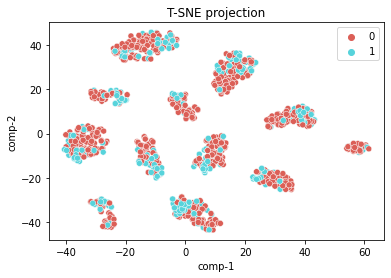

In [183]:
df = pd.DataFrame()
df["y"] = ans[0:1000]
df["comp-1"] = spotify_tsne[:,0]
df["comp-2"] = spotify_tsne[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

In [424]:
coala_feature = coala_rep
label_class = A_class

In [453]:
correlations, losses = [], []
r = []
test_accuracy = []
conf_m = []
test_order_a = []
pred_order_a = []
confusion_a = []
test_macro_f1 = []
kfold = KFold(n_splits=5, shuffle=True)
for train, test in tqdm(kfold.split(coala_feature, spotify_features, label_class)):
    
    #model
    inputA = Input(shape=(691,),name = "Coala_features")
    inputB = Input(shape=(6,),name = "Spotify_features")
    
    x = layers.Dense(32,activation='relu', 
                        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=regularizers.L2(1e-4),
                        activity_regularizer=regularizers.L2(1e-5))(inputA)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(8, activation="relu")(x)
    x = tensorflow.keras.Model(inputs=inputA, outputs=x)
    y = layers.Dense(32, activation="relu")(inputB)
    y = layers.Dropout(0.5)(y)
    y = layers.Dense(16, activation="relu")(y)
    y = layers.Dense(8, activation="relu")(y)
    y = tensorflow.keras.Model(inputs=inputB, outputs=y)
    combined = layers.concatenate([x.output, y.output])
    z = layers.Dense(4, activation="relu")(combined)
    z = layers.Dense(2, activation="sigmoid")(z)
    model = tensorflow.keras.Model(inputs=[x.input, y.input], outputs=z)
    model.compile(loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])
    a_checkpoint_filepath = './MuSe_fusion_a_best_parameter'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=a_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
    
    # Fit data to model
    coala_train_data = coala_feature[train]
    coala_train_data = StandardScaler().fit_transform(coala_train_data)
    spotify_train_data = spotify_features[train]
    spotify_train_data= StandardScaler().fit_transform(spotify_train_data)
    history = model.fit({"Coala_features":coala_train_data,
                        "Spotify_features":spotify_train_data},
                        label_class[train],
                        
                        validation_split = 0.1,
                        batch_size=64, 
                        epochs=100,
                       verbose=2,
                       callbacks=[model_checkpoint_callback])
    
    #testing
    coala_test_data = coala_feature[test]
    coala_test_data = StandardScaler().fit_transform(coala_test_data)
    spotify_test_data = spotify_features[test]
    spotify_test_data= StandardScaler().fit_transform(spotify_test_data)
    test_order_a.append(test)
    #model.load_weights(a_checkpoint_filepath)
    pred = model.predict({"Coala_features":coala_test_data,"Spotify_features":spotify_test_data})
    pred_class = K.argmax(pred)
    ans = K.argmax(label_class[test])
    correct = 0
    for i in range(0,len(ans)):
        if(pred_class[i] == ans[i]):
            pred_order_a.append(1)
            correct += 1
            # 0: HV to HV
            # 1: LV to LV
            # 2: LV to HV
            # 3: HV to LV
            if ans[i] == 0:
                confusion_a.append(0)
            else:
                confusion_a.append(1)
        else:
            pred_order_a.append(0)
            if ans[i] == 0:
                confusion_a.append(2)
            else:
                confusion_a.append(3)   
    test_acc = correct/len(ans)
    test_accuracy.append(test_acc)
    conf_m.append(confusion_matrix(pred_class,ans))
    f1 = f1_score(ans, pred_class, average='macro')
    test_macro_f1.append(f1)
    #losses.append(model.evaluate(test_features, label_class[test], verbose=0))
    #r.append(np.corrcoef(label_class[test], pred.reshape(-1))[0,1])

0it [00:00, ?it/s]

Epoch 1/100
130/130 - 1s - loss: 0.9982 - accuracy: 0.2744 - val_loss: 0.8512 - val_accuracy: 0.2039
Epoch 2/100
130/130 - 0s - loss: 0.8829 - accuracy: 0.3021 - val_loss: 0.7781 - val_accuracy: 0.4230
Epoch 3/100
130/130 - 0s - loss: 0.8272 - accuracy: 0.3629 - val_loss: 0.7383 - val_accuracy: 0.5922
Epoch 4/100
130/130 - 0s - loss: 0.7818 - accuracy: 0.4359 - val_loss: 0.7149 - val_accuracy: 0.6866
Epoch 5/100
130/130 - 0s - loss: 0.7542 - accuracy: 0.5058 - val_loss: 0.7007 - val_accuracy: 0.7505
Epoch 6/100
130/130 - 0s - loss: 0.7349 - accuracy: 0.5666 - val_loss: 0.6911 - val_accuracy: 0.7939
Epoch 7/100
130/130 - 0s - loss: 0.7210 - accuracy: 0.6177 - val_loss: 0.6843 - val_accuracy: 0.8080
Epoch 8/100
130/130 - 0s - loss: 0.7053 - accuracy: 0.6535 - val_loss: 0.6786 - val_accuracy: 0.8200
Epoch 9/100
130/130 - 0s - loss: 0.6993 - accuracy: 0.6931 - val_loss: 0.6750 - val_accuracy: 0.8265
Epoch 10/100
130/130 - 0s - loss: 0.6916 - accuracy: 0.7049 - val_loss: 0.6708 - val_accura

1it [00:31, 31.63s/it]

Epoch 1/100
130/130 - 1s - loss: 0.8117 - accuracy: 0.5075 - val_loss: 0.6438 - val_accuracy: 0.7223
Epoch 2/100
130/130 - 0s - loss: 0.6981 - accuracy: 0.6336 - val_loss: 0.5631 - val_accuracy: 0.8156
Epoch 3/100
130/130 - 0s - loss: 0.6400 - accuracy: 0.6906 - val_loss: 0.5202 - val_accuracy: 0.8221
Epoch 4/100
130/130 - 0s - loss: 0.6038 - accuracy: 0.7217 - val_loss: 0.4882 - val_accuracy: 0.8297
Epoch 5/100
130/130 - 0s - loss: 0.5794 - accuracy: 0.7372 - val_loss: 0.4627 - val_accuracy: 0.8406
Epoch 6/100
130/130 - 0s - loss: 0.5609 - accuracy: 0.7415 - val_loss: 0.4444 - val_accuracy: 0.8438
Epoch 7/100
130/130 - 0s - loss: 0.5475 - accuracy: 0.7428 - val_loss: 0.4283 - val_accuracy: 0.8416
Epoch 8/100
130/130 - 0s - loss: 0.5346 - accuracy: 0.7532 - val_loss: 0.4156 - val_accuracy: 0.8471
Epoch 9/100
130/130 - 0s - loss: 0.5216 - accuracy: 0.7590 - val_loss: 0.3994 - val_accuracy: 0.8579
Epoch 10/100
130/130 - 0s - loss: 0.5139 - accuracy: 0.7646 - val_loss: 0.3926 - val_accura

2it [00:52, 25.35s/it]

Epoch 1/100
130/130 - 1s - loss: 0.7498 - accuracy: 0.5797 - val_loss: 0.7130 - val_accuracy: 0.7744
Epoch 2/100
130/130 - 0s - loss: 0.7210 - accuracy: 0.6749 - val_loss: 0.7036 - val_accuracy: 0.8221
Epoch 3/100
130/130 - 0s - loss: 0.7117 - accuracy: 0.7073 - val_loss: 0.6966 - val_accuracy: 0.8341
Epoch 4/100
130/130 - 0s - loss: 0.7048 - accuracy: 0.7181 - val_loss: 0.6903 - val_accuracy: 0.8351
Epoch 5/100
130/130 - 0s - loss: 0.6961 - accuracy: 0.7334 - val_loss: 0.6838 - val_accuracy: 0.8416
Epoch 6/100
130/130 - 0s - loss: 0.6916 - accuracy: 0.7321 - val_loss: 0.6759 - val_accuracy: 0.8427
Epoch 7/100
130/130 - 0s - loss: 0.6855 - accuracy: 0.7376 - val_loss: 0.6655 - val_accuracy: 0.8427
Epoch 8/100
130/130 - 0s - loss: 0.6773 - accuracy: 0.7411 - val_loss: 0.6534 - val_accuracy: 0.8492
Epoch 9/100
130/130 - 0s - loss: 0.6697 - accuracy: 0.7443 - val_loss: 0.6405 - val_accuracy: 0.8460
Epoch 10/100
130/130 - 0s - loss: 0.6610 - accuracy: 0.7461 - val_loss: 0.6258 - val_accura

3it [01:15, 24.14s/it]

Epoch 1/100
130/130 - 1s - loss: 0.7759 - accuracy: 0.7109 - val_loss: 0.6544 - val_accuracy: 0.7950
Epoch 2/100
130/130 - 0s - loss: 0.7061 - accuracy: 0.7143 - val_loss: 0.6230 - val_accuracy: 0.7928
Epoch 3/100
130/130 - 0s - loss: 0.6771 - accuracy: 0.7298 - val_loss: 0.6037 - val_accuracy: 0.8091
Epoch 4/100
130/130 - 0s - loss: 0.6578 - accuracy: 0.7396 - val_loss: 0.5866 - val_accuracy: 0.8210
Epoch 5/100
130/130 - 0s - loss: 0.6437 - accuracy: 0.7426 - val_loss: 0.5714 - val_accuracy: 0.8330
Epoch 6/100
130/130 - 0s - loss: 0.6301 - accuracy: 0.7486 - val_loss: 0.5566 - val_accuracy: 0.8427
Epoch 7/100
130/130 - 0s - loss: 0.6205 - accuracy: 0.7480 - val_loss: 0.5419 - val_accuracy: 0.8449
Epoch 8/100
130/130 - 0s - loss: 0.6109 - accuracy: 0.7569 - val_loss: 0.5300 - val_accuracy: 0.8471
Epoch 9/100
130/130 - 0s - loss: 0.5987 - accuracy: 0.7590 - val_loss: 0.5155 - val_accuracy: 0.8492
Epoch 10/100
130/130 - 0s - loss: 0.5897 - accuracy: 0.7598 - val_loss: 0.5008 - val_accura

4it [01:42, 25.19s/it]

Epoch 1/100
130/130 - 1s - loss: 0.8588 - accuracy: 0.4854 - val_loss: 0.7278 - val_accuracy: 0.7332
Epoch 2/100
130/130 - 0s - loss: 0.7765 - accuracy: 0.6052 - val_loss: 0.7025 - val_accuracy: 0.7809
Epoch 3/100
130/130 - 0s - loss: 0.7414 - accuracy: 0.6563 - val_loss: 0.6888 - val_accuracy: 0.8254
Epoch 4/100
130/130 - 0s - loss: 0.7202 - accuracy: 0.7005 - val_loss: 0.6807 - val_accuracy: 0.8427
Epoch 5/100
130/130 - 0s - loss: 0.7074 - accuracy: 0.7188 - val_loss: 0.6750 - val_accuracy: 0.8492
Epoch 6/100
130/130 - 0s - loss: 0.6981 - accuracy: 0.7280 - val_loss: 0.6693 - val_accuracy: 0.8536
Epoch 7/100
130/130 - 0s - loss: 0.6905 - accuracy: 0.7356 - val_loss: 0.6643 - val_accuracy: 0.8601
Epoch 8/100
130/130 - 0s - loss: 0.6845 - accuracy: 0.7385 - val_loss: 0.6570 - val_accuracy: 0.8644
Epoch 9/100
130/130 - 0s - loss: 0.6764 - accuracy: 0.7467 - val_loss: 0.6488 - val_accuracy: 0.8655
Epoch 10/100
130/130 - 0s - loss: 0.6691 - accuracy: 0.7481 - val_loss: 0.6380 - val_accura

5it [02:08, 25.75s/it]


In [454]:
total_conf = conf_m[0]*0
for i in range(0,len(test_accuracy)):
    print("Fold {}:".format(i+1))
    print("accuracy:", test_accuracy[i])
    print("Confusion Matrix:")
    print(conf_m[i])
    total_conf += conf_m[i]
    print('macro F1 score :', test_macro_f1[i])
print("Total Confusion Matrix:\n",total_conf)
print("Avg accuracy:",np.array(test_accuracy).mean())
print("Avg macro f1 score 0:",np.array(test_macro_f1).mean())

Fold 1:
accuracy: 0.7947939262472885
Confusion Matrix:
[[1595  340]
 [ 133  237]]
macro F1 score : 0.6856994269877058
Fold 2:
accuracy: 0.7752711496746204
Confusion Matrix:
[[1513  311]
 [ 207  274]]
macro F1 score : 0.6839543831711976
Fold 3:
accuracy: 0.7704989154013016
Confusion Matrix:
[[1502  343]
 [ 186  274]]
macro F1 score : 0.6795448459031059
Fold 4:
accuracy: 0.7683297180043384
Confusion Matrix:
[[1492  305]
 [ 229  279]]
macro F1 score : 0.6795991103836471
Fold 5:
accuracy: 0.7943600867678958
Confusion Matrix:
[[1552  307]
 [ 167  279]]
macro F1 score : 0.704110715353517
Total Confusion Matrix:
 [[7654 1606]
 [ 922 1343]]
Avg accuracy: 0.7806507592190889
Avg macro f1 score 0: 0.6865816963598348


In [248]:
print(model.layers[10].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='concatenate_4/concat:0', description="created by layer 'concatenate_4'")


In [204]:
print(model.layers[3].input)

KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name='Spotify_features'), name='Spotify_features', description="created by layer 'Spotify_features'")


In [275]:
from keras import backend as K

get_3rd_layer_output = K.function(inputs = [model.layers[0].input,model.layers[3].input],
                                  outputs = [model.layers[10].output])
layer_output = get_3rd_layer_output([coala_test_data,spotify_test_data])[0]

In [276]:
print(layer_output)

[[0.         0.08264624 0.         ... 0.         0.         0.        ]
 [0.         0.         0.36767626 ... 0.         0.         0.        ]
 [4.4999194  0.         0.14556625 ... 0.         0.0354037  0.        ]
 ...
 [5.7454004  0.09194303 0.         ... 0.         0.         0.9487249 ]
 [3.6001306  0.         0.         ... 0.         0.         0.01438161]
 [2.2330565  0.81101453 0.3165831  ... 0.74538314 0.         0.        ]]


In [277]:
fusion_tsne = TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(layer_output[1000:2000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.906569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.345848
[t-SNE] KL divergence after 1000 iterations: 1.025944


[Text(0.5, 1.0, 'T-SNE projection')]

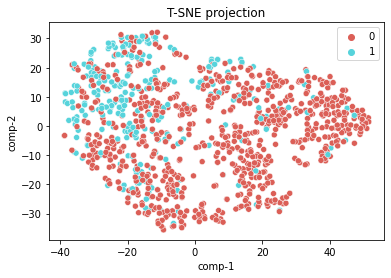

In [278]:
df = pd.DataFrame()
df["y"] = ans[1000:2000]
df["comp-1"] = fusion_tsne[:,0]
df["comp-2"] = fusion_tsne[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

In [256]:
from keras import backend as K

get_3rd_layer_output = K.function(inputs = [model.layers[0].input,model.layers[3].input],
                                  outputs = [model.layers[12].output])
layer_output = get_3rd_layer_output([coala_test_data,spotify_test_data])[0]

In [254]:
fusion_tsne = TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(layer_output[1000:2000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.251992
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.005344
[t-SNE] KL divergence after 1000 iterations: 0.538516


[Text(0.5, 1.0, 'T-SNE projection')]

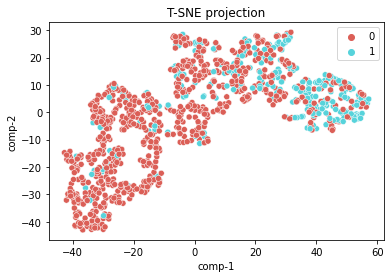

In [255]:
df = pd.DataFrame()
df["y"] = ans[1000:2000]
df["comp-1"] = fusion_tsne[:,0]
df["comp-2"] = fusion_tsne[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

In [280]:
inputA = Input(shape=(691,),name = "Coala_features")
inputB = Input(shape=(20,),name = "Spotify_features")
x = layers.Dense(32,activation='relu', 
                        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                        bias_regularizer=regularizers.L2(1e-4),
                        activity_regularizer=regularizers.L2(1e-5))(inputA)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(8, activation="relu")(x)
x = keras.Model(inputs=inputA, outputs=x)
y = layers.Dense(32, activation="relu")(inputB)
y = layers.Dropout(0.5)(y)
y = layers.Dense(16, activation="relu")(y)
y = layers.Dense(8, activation="relu")(y)
y = keras.Model(inputs=inputB, outputs=y)
combined = layers.concatenate([x.output, y.output])
z = layers.Dense(4, activation="relu")(combined)
z = layers.Dense(2, activation="sigmoid")(z)
model = keras.Model(inputs=[x.input, y.input], outputs=z)
model.compile(loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(0.0001),metrics=['accuracy'])

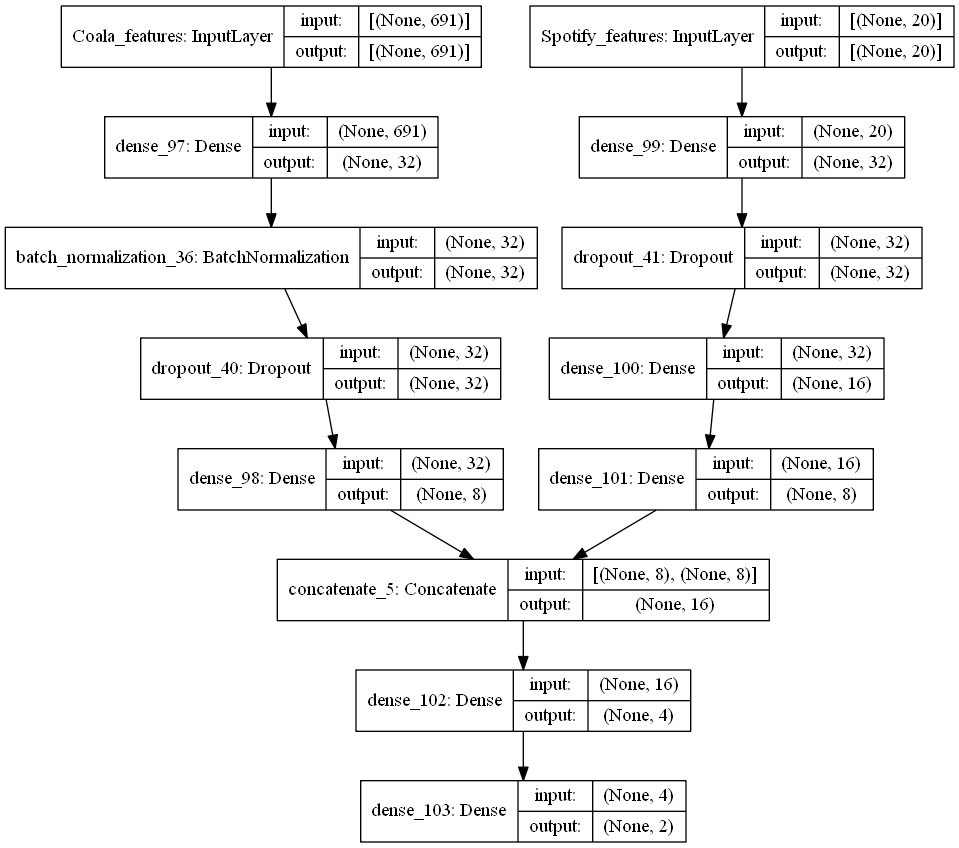

In [281]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [103]:
import json

In [326]:
with open('low_level features/0a0b76f9-ea4d-4825-b1b8-5d79021f40d4.json', newline='') as jsonfile:
    data = json.load(jsonfile)
    # 或者這樣
    # data = json.loads(jsonfile.read())
    print(data)

{'lowlevel': {'average_loudness': 0.0443166606128, 'barkbands': {'dmean': [0.0112015847117, 0.0216634683311, 0.0124637950212, 0.00251606525853, 0.00186657265294, 0.000300274637993, 0.000173671200173, 0.000566763861571, 0.000676737516187, 6.73178437864e-05, 3.45901971741e-05, 3.72444737877e-05, 3.70839625248e-05, 3.69867120753e-05, 2.42551250267e-05, 1.52935099322e-05, 1.14578097055e-05, 9.86914528767e-06, 8.52111406857e-06, 7.50343315303e-06, 1.24526632135e-05, 7.47365847928e-05, 2.60888828052e-05, 4.12245099142e-05, 4.89253170599e-06, 5.39478496648e-05, 0.000120805023471], 'dmean2': [0.0197279658169, 0.0352505855262, 0.0197031591088, 0.00389552838169, 0.00288214976899, 0.000499559857417, 0.000295987556456, 0.00090492219897, 0.00109749659896, 0.000114501606731, 5.92918004259e-05, 6.2791747041e-05, 6.2262188294e-05, 6.18872363702e-05, 4.0452418034e-05, 2.59331845882e-05, 1.95822758542e-05, 1.69078739418e-05, 1.45629719555e-05, 1.27475514091e-05, 2.02592873393e-05, 0.000111236746307, 4.8

In [347]:
for item in data['tonal']:
    if type(item) == float or type(item) == int:
        print(item)
    elif type(data['tonal'][item]) == float or type(data['tonal'][item]) == int:
        print(data['tonal'][item])
    else:
        for item2 in data['tonal'][item]:
            if type(item2) == float or type(item2) == int:
                print(item2)
            '''elif type(data['tonal'][item][item2]) == float or type(data['tonal'][item][item2]) == int:
                print(data['tonal'][item][item2])'''

0.0808213204145
28.7024898529
6.39289331436
11.6790447235
0
3.39303922653
0.902868807316
5.05315256119
2.35910868645
1.5873016119
0.0582496002316
0.0728119984269
0.0582496002316
1.49992716312
0.422309607267
0.465996801853
1.12130475044
2.00961112976
5.98514652252
4.17940855026
4.20853376389
1.04849278927
0.538808822632
1.49992716312
16.7613220215
0.00232998398133
0.561038613319
1
0.628533899784
0.229711934924
0.237792640924
0.237835556269
0.221213340759
0.25624230504
0.301150143147
0.381398558617
0.751674711704
0.927107751369
0.595776081085
0.387912452221
0.362247794867
0.349913746119
0.528559446335
0.607678592205
0.430030018091
0.349830418825
0.353517532349
0.346992433071
0.371151685715
0.384768426418
0.434256851673
0.590096056461
0.572343170643
0.397938251495
0.328282594681
0.296759516001
0.281817883253
0.330634206533
0.349925220013
0.282961606979
0.245292857289
0.240188375115
0.604407131672
0.542725145817
0.179309889674
434.193115234
0.880451619625


In [336]:
data['tonal']

{'chords_changes_rate': 0.0684057995677,
 'chords_histogram': [5.43768119812,
  2.48115944862,
  4.53333330154,
  0.834782600403,
  1.11304342747,
  0,
  0,
  20.5797100067,
  14.3884057999,
  6.40000009537,
  13.2289857864,
  8.66086959839,
  4.08115959167,
  0,
  0.730434775352,
  0.0115942033008,
  0,
  10.3304347992,
  4.75362300873,
  2.26086950302,
  0.150724634528,
  0.0231884066015,
  0,
  0],
 'chords_key': 'A#',
 'chords_number_rate': 0.00150724640116,
 'chords_scale': 'major',
 'chords_strength': {'dmean': 0.00662378687412,
  'dmean2': 0.00853444170207,
  'dvar': 3.43283354596e-05,
  'dvar2': 5.66958551644e-05,
  'max': 0.771253108978,
  'mean': 0.438267201185,
  'median': 0.437593609095,
  'min': 0.17524753511,
  'var': 0.00741122057661},
 'hpcp': {'dmean': [0.0987012609839,
   0.10571783036,
   0.106973931193,
   0.0943618714809,
   0.0953029319644,
   0.0713096931577,
   0.0506754890084,
   0.0591517798603,
   0.0632205978036,
   0.0795951411128,
   0.0785486325622,
   0.

In [327]:
for item in data:
    print(item)

lowlevel
metadata
rhythm
tonal


In [352]:
def essential_json2array(data):
    features = []
    for item in data['lowlevel']:
        if type(data['lowlevel'][item]) == float or type(data['lowlevel'][item]) == int:
            features.append(data['lowlevel'][item])
        else:
            for item2 in data['lowlevel'][item]:
                if type(data['lowlevel'][item][item2]) == float or type(data['lowlevel'][item]) == int:
                    features.append(data['lowlevel'][item][item2])
    for item in data['tonal']:
        if type(item) == float or type(item) == int:
            features.append(item)
        elif type(data['tonal'][item]) == float or type(data['tonal'][item]) == int:
                features.append(data['tonal'][item])
        else:
            for item2 in data['tonal'][item]:
                if type(item2) == float or type(item2) == int:
                    features.append(item2)
                '''elif type(data['tonal'][item][item2]) == float or type(data['tonal'][item]) == int:
                    features.append(data['tonal'][item][item2])'''
    for item in data['rhythm']:
        if type(item) == float or type(item) == int:
            features.append(item)
        elif type(data['rhythm'][item]) == float or type(data['rhythm'][item]) == int:
                features.append(data['rhythm'][item])
        else:
            for item2 in data['rhythm'][item]:
                if type(item2) == float or type(item2) == int:
                    features.append(item2)
    return features
    

In [349]:
int_df

,spotify_id,tempo_x,key_x,mode_x,loudness,time_signature,duration_ms_x,danceability_x,acousticness,speechiness,...,id,popularity,release,danceability_y,energy_y,key_y,mode_y,valence_y,tempo_y,duration_ms_y
0,4xkOaSrkexMciUUogZKVTS,171.447,1,1,-3.237,4,297787,0.548,0.062200,0.1860,...,9c7aQJ1qeGfyLNEm,80.0,2002,0.572,0.853,1.0,1.0,0.102,171.297,297893
1,3fOc9x06lKJBhz435mInlH,185.252,2,0,-2.642,4,441133,0.249,0.001310,0.0678,...,DaGhOsU4uWfVvsGB,48.0,2003,0.249,0.949,2.0,0.0,0.498,185.252,441133
2,4Q1w4Ryyi8KNxxaFlOQClK,156.103,6,1,-3.269,4,197293,0.431,0.000008,0.0789,...,2HEDUMxUacma646T,50.0,2004,0.424,0.951,4.0,1.0,0.627,156.100,197293
3,104YdibC7VQy78xAVmgRYr,119.961,9,0,-10.456,4,209800,0.771,0.116000,0.0499,...,AK9xyl9cbAnsncWA,37.0,1999,0.771,0.515,0.0,1.0,0.343,119.992,209800
4,5fU6qjmD38P90BMsuqpiuU,93.213,0,1,-5.335,4,327133,0.479,0.001140,0.0625,...,vN5Q2VvaGjH5LbfF,32.0,2003,0.479,0.913,0.0,1.0,0.413,93.213,327133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,DuIceziNklxQWBxr,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11084,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,YEWH2dMDiRCIJy7F,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11085,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,y6QD3MSUPdC87Pgb,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11086,2zQl59dZMzwhrmeSBEgiXY,146.939,1,1,-11.190,4,388960,0.724,0.262000,0.0588,...,0LwxuBXTAocDysDB,54.0,1973,0.724,0.414,1.0,1.0,0.719,146.939,388960


In [350]:
essential_df = int_df
essential_df = essential_df.dropna(subset=['mbid'])
essential_df

,spotify_id,tempo_x,key_x,mode_x,loudness,time_signature,duration_ms_x,danceability_x,acousticness,speechiness,...,id,popularity,release,danceability_y,energy_y,key_y,mode_y,valence_y,tempo_y,duration_ms_y
0,4xkOaSrkexMciUUogZKVTS,171.447,1,1,-3.237,4,297787,0.548,0.062200,0.1860,...,9c7aQJ1qeGfyLNEm,80.0,2002,0.572,0.853,1.0,1.0,0.102,171.297,297893
1,3fOc9x06lKJBhz435mInlH,185.252,2,0,-2.642,4,441133,0.249,0.001310,0.0678,...,DaGhOsU4uWfVvsGB,48.0,2003,0.249,0.949,2.0,0.0,0.498,185.252,441133
2,4Q1w4Ryyi8KNxxaFlOQClK,156.103,6,1,-3.269,4,197293,0.431,0.000008,0.0789,...,2HEDUMxUacma646T,50.0,2004,0.424,0.951,4.0,1.0,0.627,156.100,197293
3,104YdibC7VQy78xAVmgRYr,119.961,9,0,-10.456,4,209800,0.771,0.116000,0.0499,...,AK9xyl9cbAnsncWA,37.0,1999,0.771,0.515,0.0,1.0,0.343,119.992,209800
4,5fU6qjmD38P90BMsuqpiuU,93.213,0,1,-5.335,4,327133,0.479,0.001140,0.0625,...,vN5Q2VvaGjH5LbfF,32.0,2003,0.479,0.913,0.0,1.0,0.413,93.213,327133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,DuIceziNklxQWBxr,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11084,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,YEWH2dMDiRCIJy7F,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11085,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,y6QD3MSUPdC87Pgb,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11086,2zQl59dZMzwhrmeSBEgiXY,146.939,1,1,-11.190,4,388960,0.724,0.262000,0.0588,...,0LwxuBXTAocDysDB,54.0,1973,0.724,0.414,1.0,1.0,0.719,146.939,388960


In [353]:
essential_features = []
min_len = np.inf
for mbid in tqdm(essential_df.mbid.values):
    #print('low_level features/'+ mbid+'.json')
    if not os.path.exists('low_level features/'+ mbid+'.json'):
        essential_df = essential_df.drop(essential_df[essential_df['mbid'] == mbid].index)
        continue
    with open('low_level features/'+ mbid+'.json', newline='') as jsonfile:
        data = json.load(jsonfile)
    features = essential_json2array(data)
    essential_features.append(features)
    if len(features) < min_len:
        min_len = len(features)

100%|██████████| 9665/9665 [00:54<00:00, 178.36it/s]


In [354]:
essential_df

,spotify_id,tempo_x,key_x,mode_x,loudness,time_signature,duration_ms_x,danceability_x,acousticness,speechiness,...,id,popularity,release,danceability_y,energy_y,key_y,mode_y,valence_y,tempo_y,duration_ms_y
0,4xkOaSrkexMciUUogZKVTS,171.447,1,1,-3.237,4,297787,0.548,0.062200,0.1860,...,9c7aQJ1qeGfyLNEm,80.0,2002,0.572,0.853,1.0,1.0,0.102,171.297,297893
1,3fOc9x06lKJBhz435mInlH,185.252,2,0,-2.642,4,441133,0.249,0.001310,0.0678,...,DaGhOsU4uWfVvsGB,48.0,2003,0.249,0.949,2.0,0.0,0.498,185.252,441133
2,4Q1w4Ryyi8KNxxaFlOQClK,156.103,6,1,-3.269,4,197293,0.431,0.000008,0.0789,...,2HEDUMxUacma646T,50.0,2004,0.424,0.951,4.0,1.0,0.627,156.100,197293
3,104YdibC7VQy78xAVmgRYr,119.961,9,0,-10.456,4,209800,0.771,0.116000,0.0499,...,AK9xyl9cbAnsncWA,37.0,1999,0.771,0.515,0.0,1.0,0.343,119.992,209800
4,5fU6qjmD38P90BMsuqpiuU,93.213,0,1,-5.335,4,327133,0.479,0.001140,0.0625,...,vN5Q2VvaGjH5LbfF,32.0,2003,0.479,0.913,0.0,1.0,0.413,93.213,327133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,DuIceziNklxQWBxr,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11084,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,YEWH2dMDiRCIJy7F,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11085,5Knl7BTPCME3Kh5WxctWLU,118.022,5,1,-5.240,4,260413,0.711,0.129000,0.0336,...,y6QD3MSUPdC87Pgb,42.0,1987,0.711,0.875,5.0,1.0,0.925,118.022,260413
11086,2zQl59dZMzwhrmeSBEgiXY,146.939,1,1,-11.190,4,388960,0.724,0.262000,0.0588,...,0LwxuBXTAocDysDB,54.0,1973,0.724,0.414,1.0,1.0,0.719,146.939,388960


In [356]:
for i in range(len(essential_features)):
    essential_features[i] = essential_features[i][:min_len]
essential_features = np.asarray(essential_features)
essential_features.shape

(9197, 387)

In [357]:
temp_a = essential_df.arousal_tags.values
a_class = [1 if x >= 5 else 0 for x in temp_a]

In [358]:
a_class_weights = class_weight.compute_class_weight('balanced',np.unique(a_class),a_class)

In [359]:
A_class = tf.keras.utils.to_categorical(a_class)

In [360]:
a_sample_weights = np.zeros(shape=(len(A_class),))
for i in range(0,len(A_class)):
    if A_class[i][0] == 1:
        a_sample_weights[i] = a_class_weights[0]
    else:
        a_sample_weights[i] = a_class_weights[1]

In [365]:
correlations, losses = [], []
r = []
test_accuracy = []
conf_m = []
test_order_a = []
pred_order_a = []
confusion_a = []
test_macro_f1 = []
# K-fold Cross Validation model evaluation
kfold = KFold(n_splits=num_folds, shuffle=True)
for train, test in tqdm(kfold.split(essential_features,A_class,a_sample_weights)):
     # Define the model architecture
    model = Sequential()
    model.add(layers.Dense(128, input_dim=essential_features.shape[1], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.0005),metrics=['accuracy'])
    a_checkpoint_filepath = './muse_spotify_a_best_parameter'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=a_checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    
    # Fit data to model
    train_features = essential_features[train]
    train_features = StandardScaler().fit_transform(train_features)
    # Fit data to model
    history = model.fit(train_features,
                        A_class[train],
                        validation_split = 0.1,
                        batch_size=64, 
                        sample_weight = a_sample_weights[train],
                        epochs=50,
                       verbose=2,
                       callbacks=[model_checkpoint_callback])
    test_features = essential_features[test]
    test_features = StandardScaler().fit_transform(test_features)
    test_order_a.append(test)
    model.load_weights(a_checkpoint_filepath)
    pred = model.predict(test_features)
    pred_class = K.argmax(pred)
    ans = K.argmax(A_class[test])
    correct = 0
    for i in range(0,len(ans)):
        if(pred_class[i] == ans[i]):
            pred_order_a.append(1)
            correct += 1
            # 0: HV to HV
            # 1: LV to LV
            # 2: LV to HV
            # 3: HV to LV
            if ans[i] == 0:
                confusion_a.append(0)
            else:
                confusion_a.append(1)
        else:
            pred_order_a.append(0)
            if ans[i] == 0:
                confusion_a.append(2)
            else:
                confusion_a.append(3)   
    test_acc = correct/len(ans)
    test_accuracy.append(test_acc)
    conf_m.append(confusion_matrix(pred_class,ans))
    f1 = f1_score(ans, pred_class, average='macro')
    test_macro_f1.append(f1)
    #losses.append(model.evaluate(test_features, label_class[test], verbose=0))
    #r.append(np.corrcoef(label_class[test], pred.reshape(-1))[0,1])

0it [00:00, ?it/s]

Epoch 1/50
104/104 - 1s - loss: 0.7570 - accuracy: 0.5851 - val_loss: 0.4711 - val_accuracy: 0.7853
Epoch 2/50
104/104 - 0s - loss: 0.6429 - accuracy: 0.6794 - val_loss: 0.4371 - val_accuracy: 0.8166
Epoch 3/50
104/104 - 0s - loss: 0.6151 - accuracy: 0.6898 - val_loss: 0.4200 - val_accuracy: 0.8098
Epoch 4/50
104/104 - 0s - loss: 0.5840 - accuracy: 0.7049 - val_loss: 0.4121 - val_accuracy: 0.8207
Epoch 5/50
104/104 - 0s - loss: 0.5734 - accuracy: 0.6997 - val_loss: 0.4016 - val_accuracy: 0.8247
Epoch 6/50
104/104 - 0s - loss: 0.5613 - accuracy: 0.7207 - val_loss: 0.4040 - val_accuracy: 0.8261
Epoch 7/50
104/104 - 0s - loss: 0.5440 - accuracy: 0.7133 - val_loss: 0.4102 - val_accuracy: 0.8179
Epoch 8/50
104/104 - 0s - loss: 0.5468 - accuracy: 0.7262 - val_loss: 0.4037 - val_accuracy: 0.8274
Epoch 9/50
104/104 - 0s - loss: 0.5399 - accuracy: 0.7292 - val_loss: 0.4041 - val_accuracy: 0.8179
Epoch 10/50
104/104 - 0s - loss: 0.5315 - accuracy: 0.7194 - val_loss: 0.4021 - val_accuracy: 0.8220

1it [00:10, 10.36s/it]

Epoch 1/50
104/104 - 1s - loss: 0.7231 - accuracy: 0.6458 - val_loss: 0.5042 - val_accuracy: 0.7296
Epoch 2/50
104/104 - 0s - loss: 0.6327 - accuracy: 0.6798 - val_loss: 0.4827 - val_accuracy: 0.7527
Epoch 3/50
104/104 - 0s - loss: 0.6066 - accuracy: 0.6946 - val_loss: 0.4752 - val_accuracy: 0.7690
Epoch 4/50
104/104 - 0s - loss: 0.5818 - accuracy: 0.6991 - val_loss: 0.4681 - val_accuracy: 0.7717
Epoch 5/50
104/104 - 0s - loss: 0.5628 - accuracy: 0.7141 - val_loss: 0.4599 - val_accuracy: 0.7826
Epoch 6/50
104/104 - 0s - loss: 0.5652 - accuracy: 0.7161 - val_loss: 0.4615 - val_accuracy: 0.7704
Epoch 7/50
104/104 - 0s - loss: 0.5499 - accuracy: 0.7186 - val_loss: 0.4581 - val_accuracy: 0.7785
Epoch 8/50
104/104 - 0s - loss: 0.5373 - accuracy: 0.7298 - val_loss: 0.4474 - val_accuracy: 0.7894
Epoch 9/50
104/104 - 0s - loss: 0.5329 - accuracy: 0.7238 - val_loss: 0.4438 - val_accuracy: 0.7921
Epoch 10/50
104/104 - 0s - loss: 0.5273 - accuracy: 0.7380 - val_loss: 0.4448 - val_accuracy: 0.7935

2it [00:21, 10.59s/it]

Epoch 1/50
104/104 - 1s - loss: 0.7755 - accuracy: 0.6261 - val_loss: 0.4940 - val_accuracy: 0.7568
Epoch 2/50
104/104 - 0s - loss: 0.6427 - accuracy: 0.6758 - val_loss: 0.4661 - val_accuracy: 0.7853
Epoch 3/50
104/104 - 0s - loss: 0.6066 - accuracy: 0.6922 - val_loss: 0.4523 - val_accuracy: 0.7921
Epoch 4/50
104/104 - 0s - loss: 0.5880 - accuracy: 0.7002 - val_loss: 0.4517 - val_accuracy: 0.7880
Epoch 5/50
104/104 - 0s - loss: 0.5757 - accuracy: 0.7095 - val_loss: 0.4437 - val_accuracy: 0.7894
Epoch 6/50
104/104 - 0s - loss: 0.5701 - accuracy: 0.7067 - val_loss: 0.4386 - val_accuracy: 0.8084
Epoch 7/50
104/104 - 0s - loss: 0.5570 - accuracy: 0.7156 - val_loss: 0.4396 - val_accuracy: 0.7921
Epoch 8/50
104/104 - 0s - loss: 0.5445 - accuracy: 0.7265 - val_loss: 0.4396 - val_accuracy: 0.8016
Epoch 9/50
104/104 - 0s - loss: 0.5462 - accuracy: 0.7240 - val_loss: 0.4375 - val_accuracy: 0.7976
Epoch 10/50
104/104 - 0s - loss: 0.5338 - accuracy: 0.7303 - val_loss: 0.4380 - val_accuracy: 0.8071

3it [00:31, 10.29s/it]

Epoch 1/50
104/104 - 1s - loss: 0.7431 - accuracy: 0.6506 - val_loss: 0.5056 - val_accuracy: 0.7310
Epoch 2/50
104/104 - 0s - loss: 0.6375 - accuracy: 0.6803 - val_loss: 0.4770 - val_accuracy: 0.7541
Epoch 3/50
104/104 - 0s - loss: 0.6053 - accuracy: 0.6901 - val_loss: 0.4606 - val_accuracy: 0.7677
Epoch 4/50
104/104 - 0s - loss: 0.5843 - accuracy: 0.7019 - val_loss: 0.4545 - val_accuracy: 0.7731
Epoch 5/50
104/104 - 0s - loss: 0.5827 - accuracy: 0.6953 - val_loss: 0.4630 - val_accuracy: 0.7704
Epoch 6/50
104/104 - 0s - loss: 0.5720 - accuracy: 0.7028 - val_loss: 0.4378 - val_accuracy: 0.7812
Epoch 7/50
104/104 - 0s - loss: 0.5533 - accuracy: 0.7122 - val_loss: 0.4341 - val_accuracy: 0.7894
Epoch 8/50
104/104 - 0s - loss: 0.5484 - accuracy: 0.7244 - val_loss: 0.4377 - val_accuracy: 0.7853
Epoch 9/50
104/104 - 0s - loss: 0.5505 - accuracy: 0.7184 - val_loss: 0.4392 - val_accuracy: 0.7758
Epoch 10/50
104/104 - 0s - loss: 0.5417 - accuracy: 0.7140 - val_loss: 0.4379 - val_accuracy: 0.7853

4it [00:41, 10.34s/it]

Epoch 1/50
104/104 - 1s - loss: 0.7210 - accuracy: 0.6365 - val_loss: 0.4832 - val_accuracy: 0.7092
Epoch 2/50
104/104 - 0s - loss: 0.6360 - accuracy: 0.6835 - val_loss: 0.4508 - val_accuracy: 0.7527
Epoch 3/50
104/104 - 0s - loss: 0.6077 - accuracy: 0.6959 - val_loss: 0.4342 - val_accuracy: 0.7663
Epoch 4/50
104/104 - 0s - loss: 0.5953 - accuracy: 0.6942 - val_loss: 0.4307 - val_accuracy: 0.7758
Epoch 5/50
104/104 - 0s - loss: 0.5855 - accuracy: 0.7021 - val_loss: 0.4256 - val_accuracy: 0.7908
Epoch 6/50
104/104 - 0s - loss: 0.5709 - accuracy: 0.7140 - val_loss: 0.4169 - val_accuracy: 0.7976
Epoch 7/50
104/104 - 0s - loss: 0.5624 - accuracy: 0.7117 - val_loss: 0.4174 - val_accuracy: 0.8043
Epoch 8/50
104/104 - 0s - loss: 0.5509 - accuracy: 0.7098 - val_loss: 0.4130 - val_accuracy: 0.7935
Epoch 9/50
104/104 - 0s - loss: 0.5501 - accuracy: 0.7244 - val_loss: 0.4143 - val_accuracy: 0.7962
Epoch 10/50
104/104 - 0s - loss: 0.5408 - accuracy: 0.7191 - val_loss: 0.4059 - val_accuracy: 0.8003

5it [00:51, 10.31s/it]


In [366]:
total_conf = conf_m[0]*0
for i in range(0,len(test_accuracy)):
    print("Fold {}:".format(i+1))
    print("accuracy:", test_accuracy[i])
    print("Confusion Matrix:")
    print(conf_m[i])
    total_conf += conf_m[i]
    print('macro F1 score :', test_macro_f1[i])
print("Total Confusion Matrix:\n",total_conf)
print("Avg accuracy:",np.array(test_accuracy).mean())
print("Avg macro f1 score 0:",np.array(test_macro_f1).mean())

Fold 1:
accuracy: 0.7418478260869565
Confusion Matrix:
[[1041  155]
 [ 320  324]]
macro F1 score : 0.6956306279168005
Fold 2:
accuracy: 0.7217391304347827
Confusion Matrix:
[[967 112]
 [400 361]]
macro F1 score : 0.6878839000200108
Fold 3:
accuracy: 0.7030995106035889
Confusion Matrix:
[[1009  131]
 [ 415  284]]
macro F1 score : 0.6484629044048656
Fold 4:
accuracy: 0.723762914627515
Confusion Matrix:
[[988 107]
 [401 343]]
macro F1 score : 0.6850152534006587
Fold 5:
accuracy: 0.7145187601957586
Confusion Matrix:
[[965 112]
 [413 349]]
macro F1 score : 0.6784392157777026
Total Confusion Matrix:
 [[4970  617]
 [1949 1661]]
Avg accuracy: 0.7209936283897204
Avg macro f1 score 0: 0.6790863803040077
